# <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Analysis of US Citizens by Income Levels</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Data Analysis & Visualization with Python</p>


The adult dataset is from the 1996 Census database. It is also known as “Census Income” dataset. Details of this dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Adult).

### Aim of the Project

Applying Exploratory Data Analysis (EDA) and preparing the data to implement the Machine Learning Algorithms;
1. Analyzing the characteristics of individuals according to income groups
2. Preparing data to create a model that will predict the income levels of people according to their characteristics (So the "salary" feature is the target feature)

<p style=" font-family:newtimeroman; color:#060108; font-size:175%; text-align:left; border-radius:10px 10px;">Dataset Info:</p>


The Census Income dataset has 32561 entries. Each entry contains the following information about an individual:

- **salary (target feature/label):** whether or not an individual makes more than $50,000 annually. (<= 50K, >50K)
- **age:** the age of an individual. (Integer greater than 0)
- **workclass:** a general term to represent the employment status of an individual. (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)
- **fnlwgt:** this is the number of people the census believes the entry represents. People with similar demographic characteristics should have similar weights.  There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.(Integer greater than 0)
- **education:** the highest level of education achieved by an individual. (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.)
- **education-num:** the highest level of education achieved in numerical form. (Integer greater than 0)
- **marital-status:** marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces. Married-spouse-absent includes married people living apart because either the husband or wife was employed and living at a considerable distance from home (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
- **occupation:** the general type of occupation of an individual. (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
- **relationship:** represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute. (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
- **race:** Descriptions of an individual’s race. (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- **sex:** the biological sex of the individual. (Male, female)
- **capital-gain:** capital gains for an individual. (Integer greater than or equal to 0)
- **capital-loss:** capital loss for an individual. (Integer greater than or equal to 0)
- **hours-per-week:** the hours an individual has reported to work per week. (continuous)
- **native-country:** country of origin for an individual (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)

Having examined the features above, it can be concluded that some of the variables, such as **``fnlwgt``** are not related directly to the target variable **``income``** and are not self-explanatory. Therefore, they can be removed from the Dataset if Machine Learning model will be built. The continuous variable **``fnlwgt``** represents final weight, which is the number of units in the target population that the responding unit represents. The variable **``education_num``** stands for the number of years of education in total, which is a continuous representation of the discrete variable education. The variable **``relationship``** represents the responding unit’s role in the family. **``capital_gain``** and **``capital_loss``** are income from investment sources other than wage/salary.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
from termcolor import colored

from skimpy import clean_columns
%matplotlib inline
# %matplotlib notebook

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
# to disable scientific notation 
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# to reset to the original settings we can use
# pd.reset_option('display.float_format', silent=True)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
# Reading the data from csv file
df = pd.read_csv(("adult_eda.csv"))
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.000,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.000,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.000,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.000,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


In [3]:
df_backup = df

## 1. Recognizing and Understanding Data

### 1.1. To Recognize and undrestand the data I'll do the followings

- Check the head, sample, shape, data-types of the features.
- Check if there are some dublicate rows or not. If there are, then drop them. 
- Check the statistical values of features.
- If needed, rename the columns' names for easy use. 
- Basically check the missing values.

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
16458,49,Federal-gov,35406,HS-grad,9.000,Widowed,Exec-managerial,Not-in-family,White,Female,0,0,20,United-States,<=50K
23449,23,Private,162551,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,Asian-Pac-Islander,Female,0,0,20,United-States,<=50K
8685,33,Private,171876,Some-college,10.000,Divorced,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
30191,69,Self-emp-not-inc,92472,10th,6.000,Married-spouse-absent,Farming-fishing,Not-in-family,White,Male,3273,0,45,United-States,<=50K
29083,53,Private,187356,Some-college,10.000,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,66,United-States,<=50K
22386,37,Private,102953,HS-grad,9.000,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
24443,46,Private,113390,Masters,14.000,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,1740,60,United-States,<=50K
1258,43,Federal-gov,369468,Bachelors,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
2684,78,Local-gov,136198,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,15,United-States,<=50K
2876,25,Private,503012,5th-6th,3.000,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K


In [6]:
df.shape # there are 32561 rows and 15 columns (features) in the dataset. This means there are 32561 samples in the dataset

(32561, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


it seems education-num and relationship have missing values. Bu I don't know yet if other features have inappropriate values 

In [8]:
df.duplicated().sum()

24

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape # 32561 - 32537 = 24 rows are dropped

(32537, 15)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.000,38.586,13.638,17.000,28.000,37.000,48.000,90.000
fnlwgt,32537.000,189780.849,105556.471,12285.000,117827.000,178356.000,236993.000,1484705.000
education-num,31735.000,10.084,2.575,1.000,9.000,10.000,12.000,16.000
capital-gain,32537.000,1078.444,7387.957,0.000,0.000,0.000,0.000,99999.000
capital-loss,32537.000,87.368,403.102,0.000,0.000,0.000,0.000,4356.000
hours-per-week,32537.000,40.440,12.347,1.000,40.000,40.000,45.000,99.000


In [13]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [14]:
# changing the column names

df = clean_columns(df)

6 column names have been cleaned

In [15]:
df.head(3).T # checking the column names is ok

,0,1,2
age,39,50,38
workclass,State-gov,Self-emp-not-inc,Private
fnlwgt,77516,83311,215646
education,Bachelors,Bachelors,HS-grad
education_num,13.000,13.000,9.000
marital_status,Never-married,Married-civ-spouse,Divorced
occupation,Adm-clerical,Exec-managerial,Handlers-cleaners
relationship,Not-in-family,Husband,Not-in-family
race,White,White,White
sex,Male,Male,Male


In [16]:
# checking the sum of missing values per column 

df.isnull().sum() 

age                  0
workclass            0
fnlwgt               0
education            0
education_num      802
marital_status       0
occupation           0
relationship      5064
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
salary               0
dtype: int64

In [17]:
# Checking the percentage of missing values for each column. len(df): 32537
df.isnull().sum()*100/len(df)

age               0.000
workclass         0.000
fnlwgt            0.000
education         0.000
education_num     2.465
marital_status    0.000
occupation        0.000
relationship     15.564
race              0.000
sex               0.000
capital_gain      0.000
capital_loss      0.000
hours_per_week    0.000
native_country    0.000
salary            0.000
dtype: float64

In [18]:

print(colored('Missing Value Information Per Column:\n', 'blue', attrs=['bold']))
miss_count = df.isna().sum()
miss_percentage = df.isna().sum()*100/len(df)

miss_df = pd.concat([miss_count , miss_percentage],axis=1)
miss_df = pd.DataFrame(data=miss_df)
miss_df.columns = ["Missing_Values_Sum", "Missing_Value_Percentage"]
miss_df
# or i could write code above like below
# missing_df = pd.concat({"Missing Values Sum": missing_count, "Missing_Value_Percentage": missing_per}, axis=1)

Missing Value Information Per Column:



,Missing_Values_Sum,Missing_Value_Percentage
age,0,0.000
workclass,0,0.000
fnlwgt,0,0.000
education,0,0.000
education_num,802,2.465
marital_status,0,0.000
occupation,0,0.000
relationship,5064,15.564
race,0,0.000
sex,0,0.000


<Figure size 720x360 with 0 Axes>

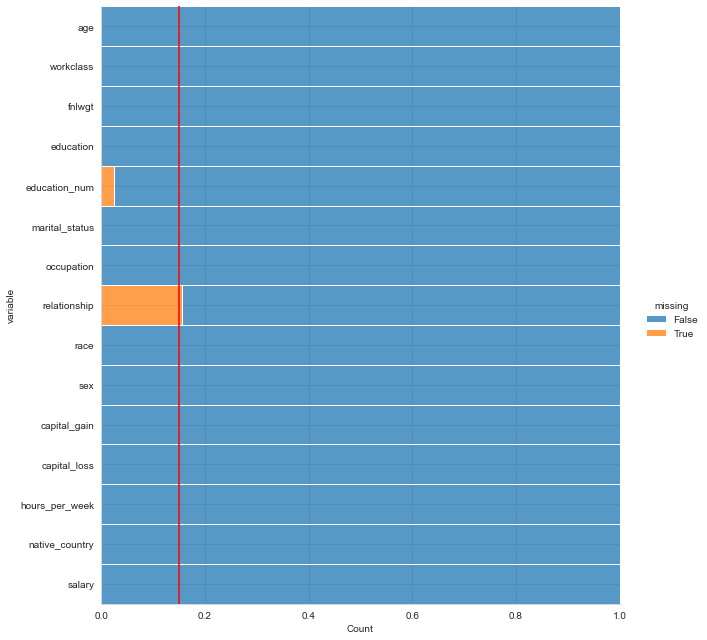

In [19]:
# Show null values with graph
# The codes below plots missing values for each column by observation in the dataset

plt.figure(figsize=(10,5))
sns.displot(data=df.isnull().melt(value_name='missing'),
            y="variable",
            hue="missing",
            multiple="fill",
            height=9,
           )
plt.axvline(.15, color = 'red')
plt.show()

**Some Notes About Missing Values:** There is a high number of missing values in the Relationship column. People might prefer not to disclose their relationships in the family or hesitate to answer as "not-in-family", which might be a sensitive/personal issue. Even if its percentage is small, Education column is also missing with the value of 2.5% of the inputs. There might be some individuals who never attended a school as there is no option given in the survey or they might hesitate to disclose their educational background.

### 1.2 Looking at the value counts of columns that have object datatype and detect strange values apart from the NaN Values

In [20]:
# Descriptive Statistics of Categorical Features in the Dataset
# So we selected the categorical columns using the select_dtypes() function.

print(colored('Descriptive Statistics of Categorical Features:\n', 'blue', attrs=['bold']))
df.describe(include="object").T

Descriptive Statistics of Categorical Features:



,count,unique,top,freq
workclass,32537,9,Private,22673
education,32537,16,HS-grad,10494
marital_status,32537,7,Married-civ-spouse,14970
occupation,32537,15,Prof-specialty,4136
relationship,27473,5,Husband,13187
race,32537,5,White,27795
sex,32537,2,Male,21775
native_country,32537,42,United-States,29153
salary,32537,2,<=50K,24698


In [21]:
object_col = df.select_dtypes(include="object").columns
object_col

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'salary'],
      dtype='object')

In [22]:
# Checking uniques and their numbers at Categorical Features in the Dataset

for col in object_col:
    print(col)
    print("--"*13)
    print(df[col].value_counts(dropna=False))
    print("---"*10)
    print('\n')

workclass
--------------------------
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
------------------------------


education
--------------------------
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64
------------------------------


marital_status
--------------------------
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-ab

I saw in workclass, occupation and native country column there are 1836, 1843 and 582 rows have '?' input respectively.
Now I'm wondering about are there any columns that have '?' input.

In [23]:
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     582
salary               0
dtype: int64

## 2. Univariate & Multivariate Analysis

### 2.1 Salary (Target Feature)

In [24]:
df.salary.value_counts(dropna=False)

<=50K    24698
>50K      7839
Name: salary, dtype: int64

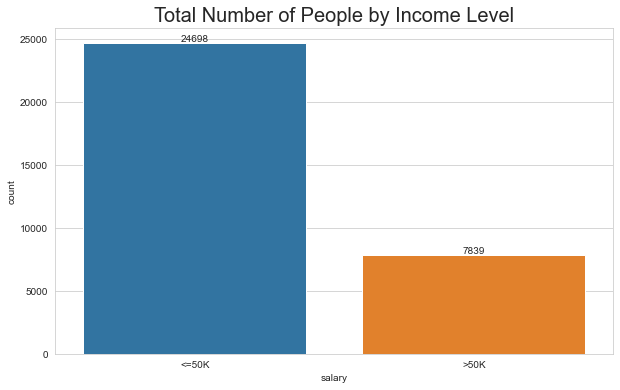

In [25]:
# Checking the counts of unique values in "salary" feature
fig, ax = plt.subplots()

ax = sns.countplot(data=df, x='salary')

ax.set_title("Total Number of People by Income Level", fontsize = 20)

for container in ax.containers:
    ax.bar_label(container)
    
# another way to show Labels        
#ax.bar_label(ax.containers[0], size=12)

In [26]:
# Checking the percentage of person in salary feature and visualize it with a piechart

In [27]:
df.salary.value_counts(normalize=True)

<=50K   0.759
>50K    0.241
Name: salary, dtype: float64

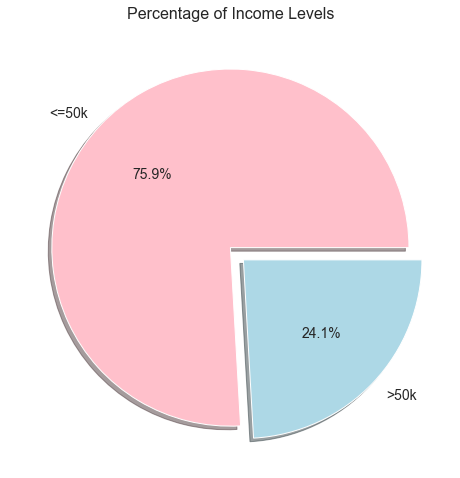

In [28]:
fig,ax = plt.subplots(figsize=(8,10))
ax.pie(x = df.salary.value_counts(),
      labels=['<=50k', '>50k'],
      explode =(0, .1),
      autopct='%.1f%%',
      colors=['pink','lightblue'],
      textprops={'fontsize':14},
      shadow=True)


plt.title('Percentage of Income Levels',fontdict={'fontsize':16})
plt.show()

As seen people who earn more than 50k are far lower than those who earn less than 50k. It is clearly concluded that 25% percent of the individuals are at the high income level.

## 2.2. Numeric Features

### 2.2.1.  Age

To display the distribution of data based on five number summary(minimum, first quartile, median, third quartile and maximum) I'll use boxplot. It can tell me about outliers and their values

Text(0.5, 1.0, 'Age Distribution')

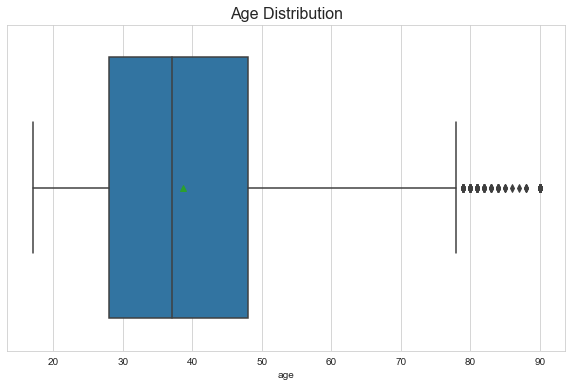

In [29]:
sns.boxplot(data=df,
            x='age',
            showmeans=True )
plt.title('Age Distribution', fontsize=16)

It is concluded that Age distribution is right skewed.

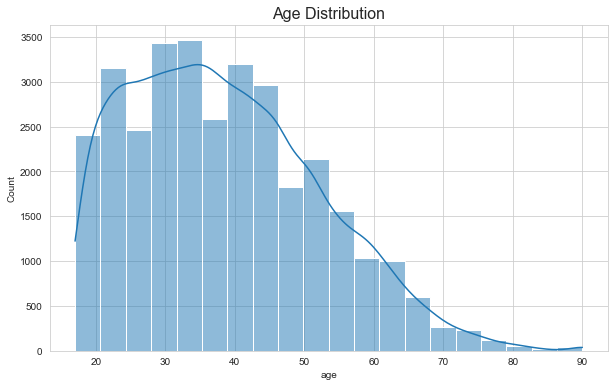

In [30]:
# Displaying the distribution of age fature with histogram plot
sns.histplot(data=df,
             x= 'age',
            kde=True,
            bins=20)
plt.title("Age Distribution", fontsize = 16)
plt.show()

In [31]:
# Checking the statistical values of age

df.age.describe()

count   32537.000
mean       38.586
std        13.638
min        17.000
25%        28.000
50%        37.000
75%        48.000
max        90.000
Name: age, dtype: float64

Text(0.5, 1.0, 'Age Boxplot by Salary Levels')

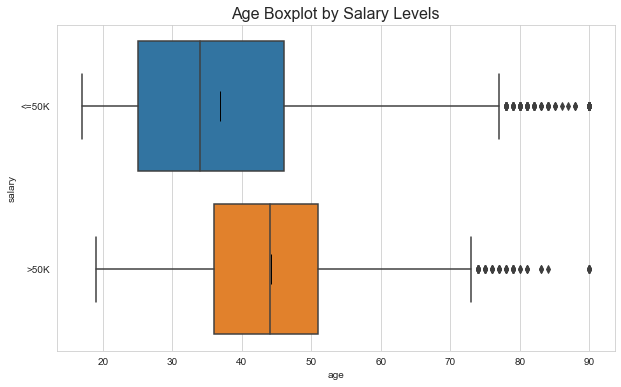

In [32]:
# Checking the age feature by salary levels
sns.boxplot(data=df,
           x= 'age',
           y='salary',
           showmeans = True,
           meanprops = {"marker":'|',
                       'markersize':30,
                       'markeredgecolor':'black'});
plt.title("Age Boxplot by Salary Levels", fontsize=16)

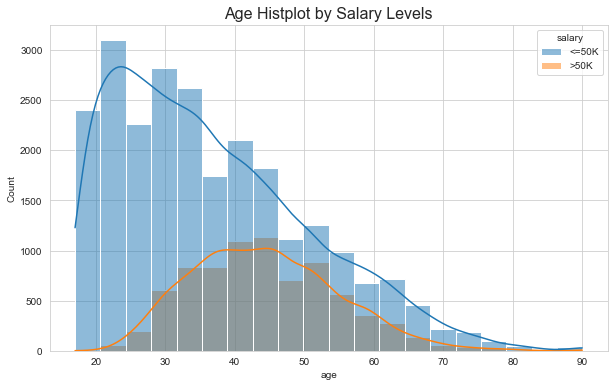

In [33]:
sns.histplot(data=df,
            x='age',
            hue='salary',
            bins=20,
            kde=True)

plt.title("Age Histplot by Salary Levels", fontsize=16)
plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

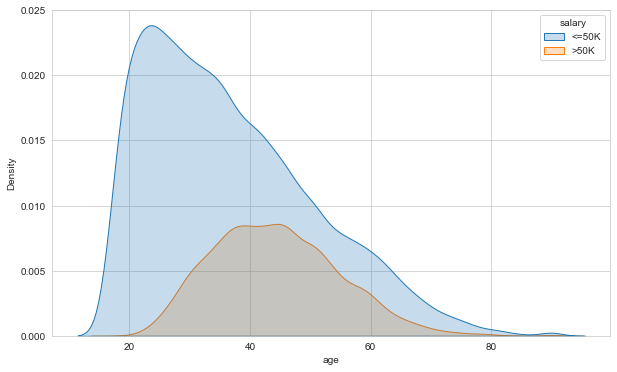

In [34]:
sns.kdeplot(data=df, x='age',  hue='salary', fill=True)

In [35]:
df.groupby('salary').age.describe().T

salary,<=50K,>50K
count,24698.000,7839.000
mean,36.787,44.251
std,14.017,10.520
min,17.000,19.000
25%,25.000,36.000
50%,34.000,44.000
75%,46.000,51.000
max,90.000,90.000


Conclusion
About Age Feature
- There are some extreme values around 80 years
- Mean is 38.5 and majority of people are between 28 and 48 years old.
- The age distribution is right skewed, this means young people are more than old people

Age Feature by the salary levels
- Older people earn more than younger people
- Mean and median of high income group are higher than low income group. This means older people earns more than younger people. 

- High income group distribution is close to normal distribution but low income group distribution is right skewed.

### 2.2.2 fnlwgt

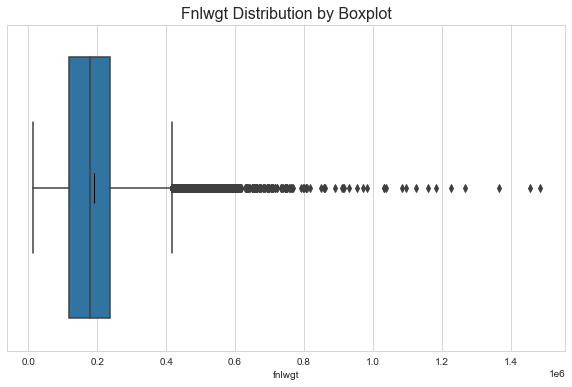

In [36]:
# checking the boxplot to see extreme values
sns.boxplot(data=df,
            x='fnlwgt',
           showmeans=True,
           meanprops = {"marker":'|',
                       'markersize':30,
                       'markeredgecolor':'black'})
plt.title("Fnlwgt Distribution by Boxplot",fontsize=16)
plt.show()

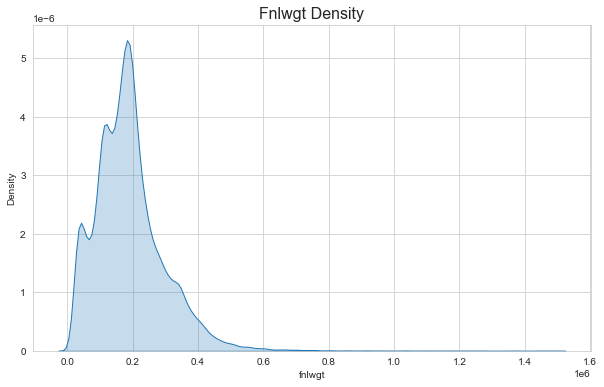

In [37]:
# checking density distribution of fnlwgt feature
sns.kdeplot(data=df, x='fnlwgt', fill=True)

plt.title('Fnlwgt Density', fontsize = 16);

In [38]:
# Descriptive Statistics of "fnlwgt" Feature
df.fnlwgt.describe()

count     32537.000
mean     189780.849
std      105556.471
min       12285.000
25%      117827.000
50%      178356.000
75%      236993.000
max     1484705.000
Name: fnlwgt, dtype: float64

Text(0.5, 1.0, 'Fnlwgt Distribution by Salary')

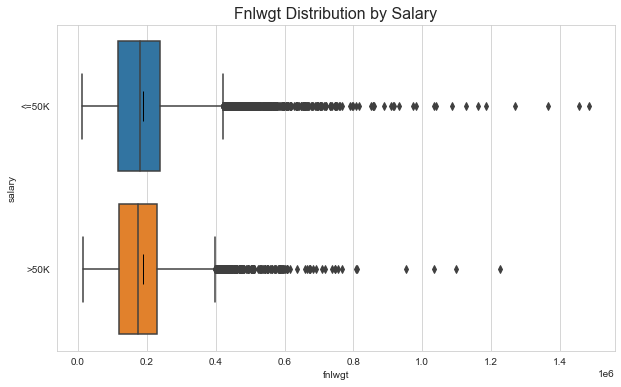

In [39]:
# Checking the boxplot by salary levels
sns.boxplot(data=df,
           x='fnlwgt',
           y='salary',
           showmeans=True,
           meanprops = {"marker":'|',
                       'markersize':30,
                       'markeredgecolor':'black'})
plt.title("Fnlwgt Distribution by Salary", fontsize=16)

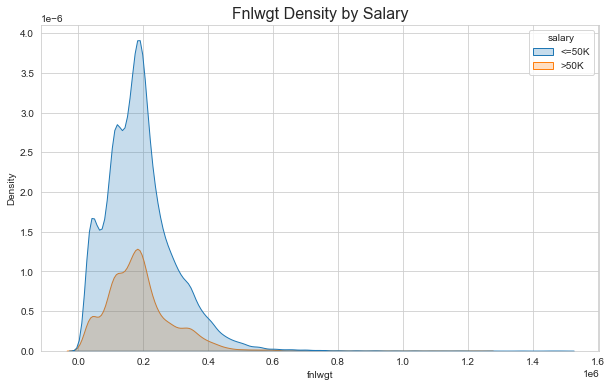

In [40]:
# Checking Density Distribution of "fnlwgt" feature by Salary
sns.kdeplot(data=df,
           x='fnlwgt',
           hue='salary',
           fill=True)

plt.title("Fnlwgt Density by Salary", fontsize=16);

In [41]:
# Descriptive Statistics of "fnlwgt" with respect to salary levels
df.groupby('salary').fnlwgt.describe().T

salary,<=50K,>50K
count,24698.000,7839.000
mean,190345.927,188000.481
std,106487.413,102554.464
min,12285.000,14878.000
25%,117606.000,119100.000
50%,179465.000,176063.000
75%,238968.250,230969.000
max,1484705.000,1226583.000


Conclusion About Fnlwgt Feature
- It looks like there is no difference between high and low income groups according to the fnlwgt feature.
- There is a very high difference between 75% values and max values in both income levels. it is need to be examine by field expertise.

### 2.2.3. Capital Gain

### [Domain Knowledge About](https://en.wikipedia.org/wiki/Capital_gain)

**What is 'Capital Gain?'**

Capital gain is an economic concept defined as the profit earned on the sale of an asset which has increased in value over the holding period. An asset may include tangible property, a car, a business, or intangible property such as shares.

A capital gain is only possible when the selling price of the asset is greater than the original purchase price. In the event that the purchase price exceeds the sale price, a capital loss occurs. Capital gains are often subject to taxation, of which rates and exemptions may differ between countries. 


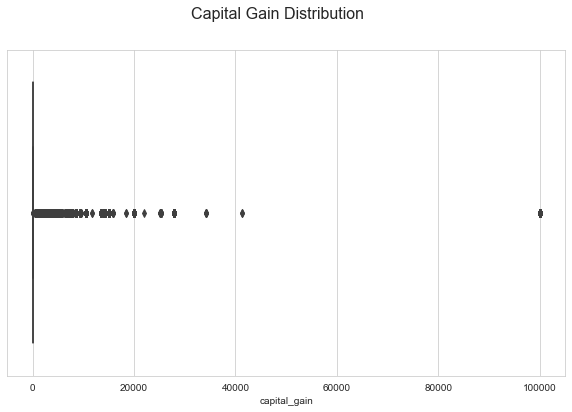

In [42]:
# checking the boxplot to see extreme values
sns.boxplot(data=df,
           x='capital_gain')
plt.suptitle("Capital Gain Distribution", fontsize=16);

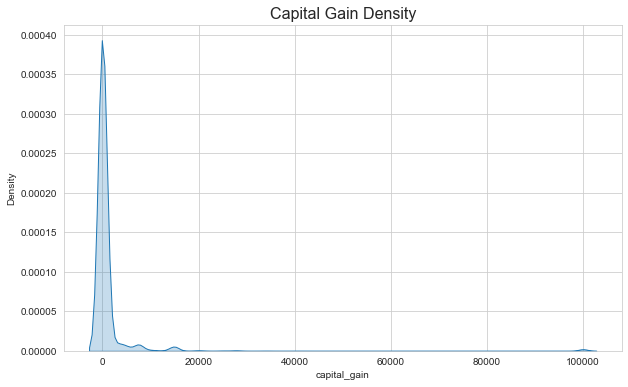

In [43]:
# Checking Density Distribution of the "capital_gain" feature 
sns.kdeplot(data=df,
           x='capital_gain',
           fill=True)
plt.title('Capital Gain Density', fontsize = 16);

In [44]:
df.capital_gain.describe()

count   32537.000
mean     1078.444
std      7387.957
min         0.000
25%         0.000
50%         0.000
75%         0.000
max     99999.000
Name: capital_gain, dtype: float64

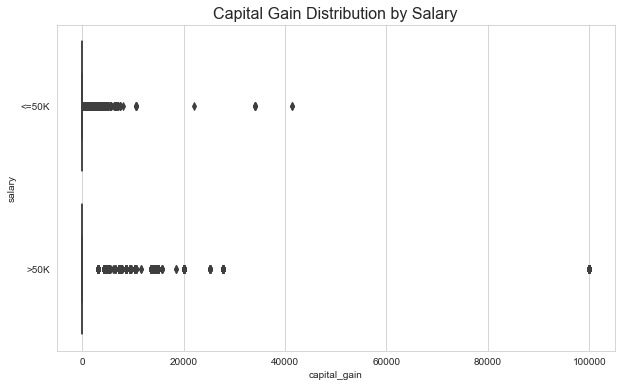

In [45]:
# Checking the extreme values in the "capital_gain" feature by Salary with box plot
sns.boxplot(data=df,
           x='capital_gain',
           y='salary')
plt.title("Capital Gain Distribution by Salary", fontsize=16);

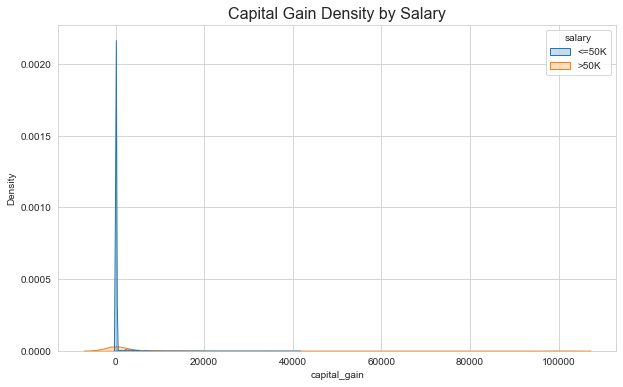

In [46]:
sns.kdeplot(data=df,
           x='capital_gain',
           hue='salary',
           fill=True)
plt.title("Capital Gain Density by Salary", fontsize=16);

In [47]:
df.groupby('salary').capital_gain.describe().T

salary,<=50K,>50K
count,24698.000,7839.000
mean,148.885,4007.165
std,963.558,14572.097
min,0.000,0.000
25%,0.000,0.000
50%,0.000,0.000
75%,0.000,0.000
max,41310.000,99999.000


In [48]:
# Checking the statistical values by salary for non-zero capital gain 
df[df.capital_gain!=0].groupby('salary').capital_gain.describe().T

salary,<=50K,>50K
count,1035.000,1677.000
mean,3552.813,18731.165
std,3173.419,26778.676
min,114.000,3103.000
25%,2202.000,7298.000
50%,3273.000,7896.000
75%,4101.000,15024.000
max,41310.000,99999.000


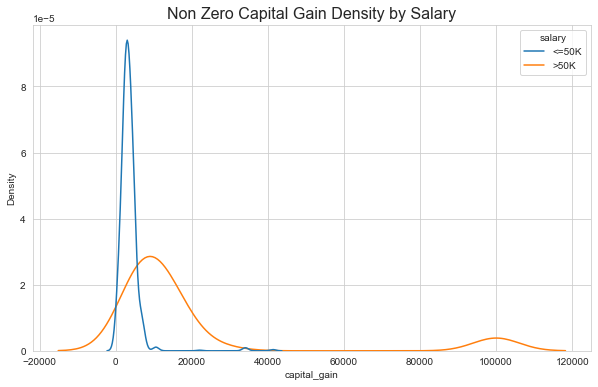

In [49]:
# Checking Density Distribution of non-zero capital_gain feature by Salary 
non_zero_cg = df[df.capital_gain!=0]
sns.kdeplot(data=non_zero_cg,
                x='capital_gain',
                hue='salary')
plt.title("Non Zero Capital Gain Density by Salary", fontsize=16);

Conclusion About Capital Gain Feature
- Most of people have no capital gain
- The more income, the more capital gain
- People who are in high income level are tend to make investments more than thow in low income level. However more than 75% of people in both groups have no capital gain.

### 2.2.4 Capital Loss

### [Domain Knowledge About](https://www.investopedia.com/terms/c/capitalloss.asp)

**What Is a Capital Loss?**

A capital loss is the loss incurred when a capital asset, such as an investment or real estate, decreases in value. This loss is not realized until the asset is sold for a price that is lower than the original purchase price. In simple terms, the difference between the selling price and cost/purchase price of an investment can be described as capital gain/loss.

KEY TAKEAWAYS
- A capital loss is a loss incurred when a capital asset is sold for less than the price it was purchased for.
- In regards to taxes, capital gains can be offset by capital losses, reducing taxable income by the amount of the capital loss.
Capital gains and capital losses are reported on Form 8949.
- The Internal Revenue Service (IRS) puts measures around wash sales to prevent investors from taking advantage of the tax benefits of capital losses.

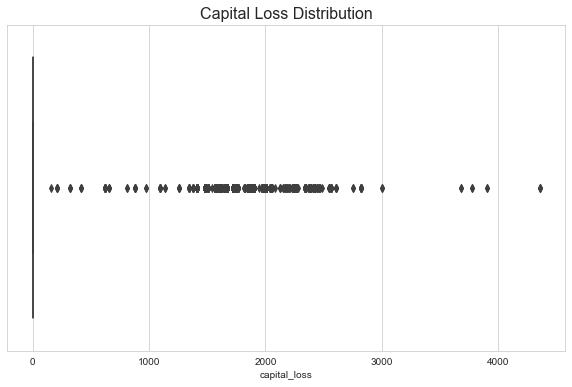

In [50]:
# Checking the extreme values in the "capital_loss" feature with box plot

sns.boxplot(data=df, x="capital_loss")

plt.title("Capital Loss Distribution", fontsize=16);

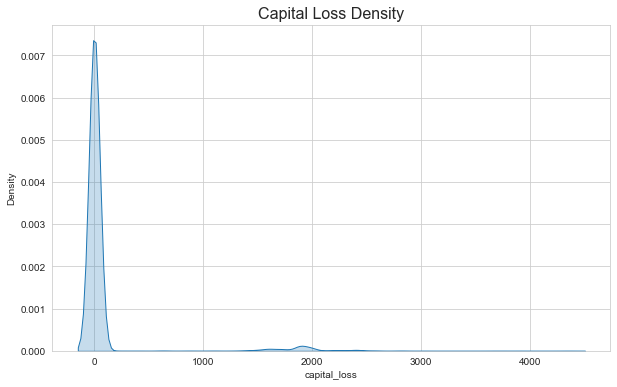

In [51]:
# Checking Density Distribution of the "capital_loss" feature 

sns.kdeplot(data=df,
           x='capital_loss',
           fill=True)
plt.title('Capital Loss Density', fontsize = 16);

In [52]:
# Descriptive Statistics of "capital_loss" Feature

df.capital_gain.describe()

count   32537.000
mean     1078.444
std      7387.957
min         0.000
25%         0.000
50%         0.000
75%         0.000
max     99999.000
Name: capital_gain, dtype: float64

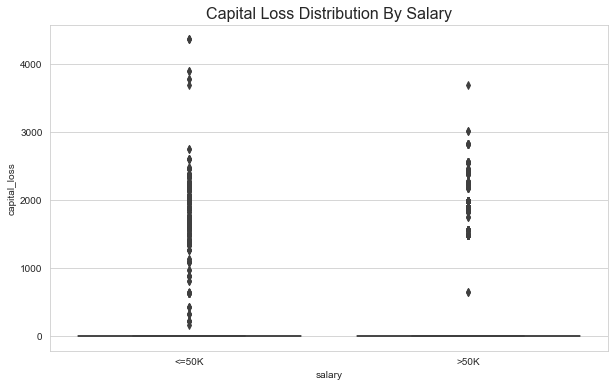

In [53]:
# Checking the extreme values in the "capital_loss" feature by Salary with box plot

sns.boxplot(data=df, x="salary", y="capital_loss")

plt.title("Capital Loss Distribution By Salary", fontsize=16);

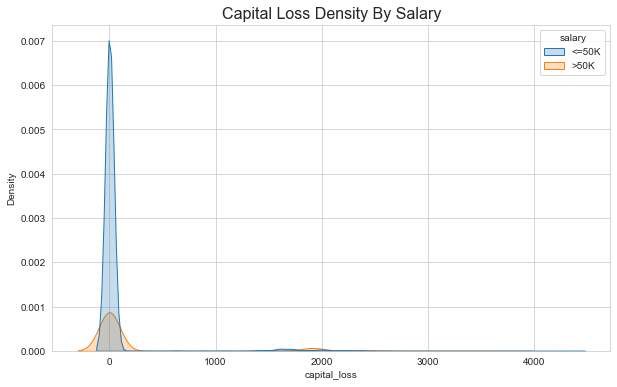

In [54]:
# Checking Density Distribution of the "capital_loss" feature by Salary 

sns.kdeplot(data=df, x="capital_loss", hue="salary", fill=True)

plt.title("Capital Loss Density By Salary", fontsize=16);

In [55]:
# Descriptive Statistics of "capital_loss" by Salary

df.groupby('salary').capital_loss.describe().T

salary,<=50K,>50K
count,24698.000,7839.000
mean,53.190,195.051
std,310.890,595.555
min,0.000,0.000
25%,0.000,0.000
50%,0.000,0.000
75%,0.000,0.000
max,4356.000,3683.000


In [56]:
# Checking the statistical values by salary for non-zero capital loss
df[df.capital_loss!=0].groupby('salary').capital_loss.describe().T

salary,<=50K,>50K
count,746.000,773.000
mean,1760.983,1978.017
std,438.906,264.144
min,155.000,653.000
25%,1590.000,1887.000
50%,1721.000,1902.000
75%,1980.000,1977.000
max,4356.000,3683.000


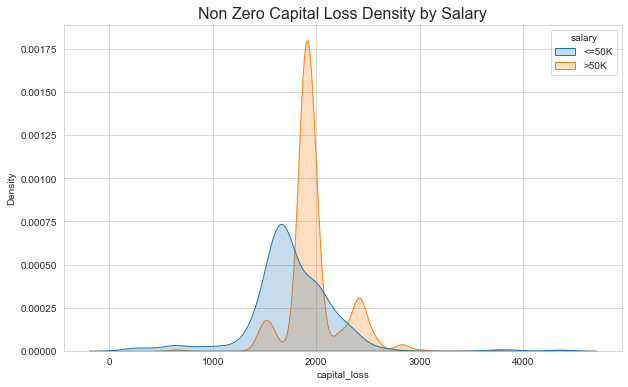

In [57]:
# Checking Density Distribution of non-zero capital_loss feature by Salary 

non_zero_cl=df[df.capital_loss!=0]
sns.kdeplot(data=non_zero_cl,
           x='capital_loss',
            fill=True,
            hue='salary')
plt.title("Non Zero Capital Loss Density by Salary", fontsize=16);

Conclusion About Capital Gain Feature 

Unlike the capital gain, we recognize a similar patterns for both salary-levels populations in the capital loss data.

### 2.2.5. Hours Per Week

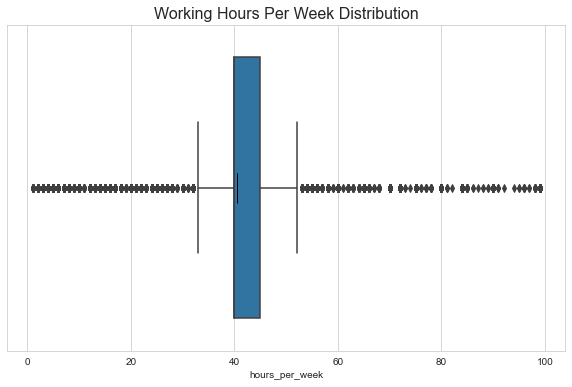

In [58]:
# Checking the extreme values in the "hours_per_week" feature with box plot

sns.boxplot(data=df,
            x="hours_per_week",
           showmeans=True,
           meanprops={'marker':'|',
                     'markeredgecolor':'black',
                     'markersize':30})

plt.title("Working Hours Per Week Distribution", fontsize=16);

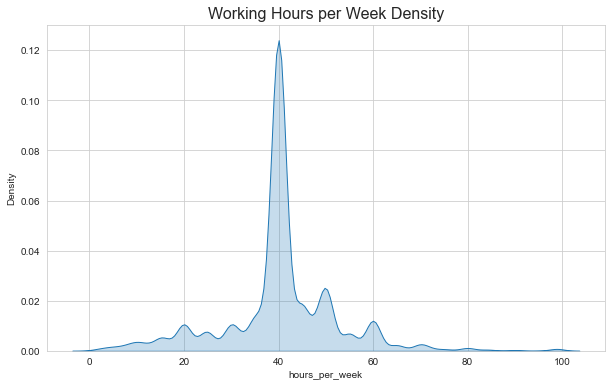

In [59]:
# Checking Density Distribution of the "hours_per_week" Feature
sns.kdeplot(data=df,
           x='hours_per_week',
           fill=True)
plt.title('Working Hours per Week Density',fontsize=16);

In [60]:
# Descriptive Statistics of "hours_per_week" Feature
df.hours_per_week.describe()

count   32537.000
mean       40.440
std        12.347
min         1.000
25%        40.000
50%        40.000
75%        45.000
max        99.000
Name: hours_per_week, dtype: float64

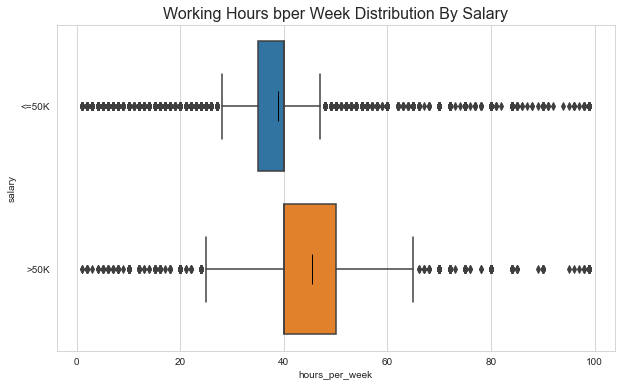

In [61]:
# Checking the extreme values in the "hours_per_week" by Salary with box plot
sns.boxplot(data=df,
           x='hours_per_week',
           y='salary',
           showmeans=True,
           meanprops={'marker':'|',
                     'markeredgecolor':'black',
                     'markersize':30})
plt.title("Working Hours bper Week Distribution By Salary", fontsize=16);

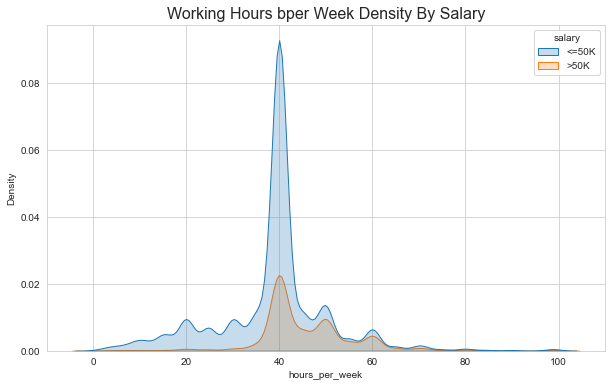

In [62]:
# Checking Density Distribution of the "hours_per_week" by Salary 
sns.kdeplot(data=df,
           x='hours_per_week',
           fill=True,
           hue='salary')
plt.title("Working Hours bper Week Density By Salary", fontsize=16);

In [63]:
# Descriptive Statistics of "hours_per_week" by Salary
df.groupby('salary').hours_per_week.describe().T

salary,<=50K,>50K
count,24698.000,7839.000
mean,38.843,45.473
std,12.318,11.014
min,1.000,1.000
25%,35.000,40.000
50%,40.000,40.000
75%,40.000,50.000
max,99.000,99.000


⭐ Conclusion About Hours per Week Feature 

- Highl level income group works greater than low level income group
- Most of high level income group work over 40 hours or equal 40 hours
- Low level income group has a normal distribution around 40 hours but high level income group has a right skewed distribution
- Since the number of working hours is standardized, it doesn't change much across the salary levels. Both groups' work hours per week clustered around 40 hours, this means 8 hours per day as a full time employees. 


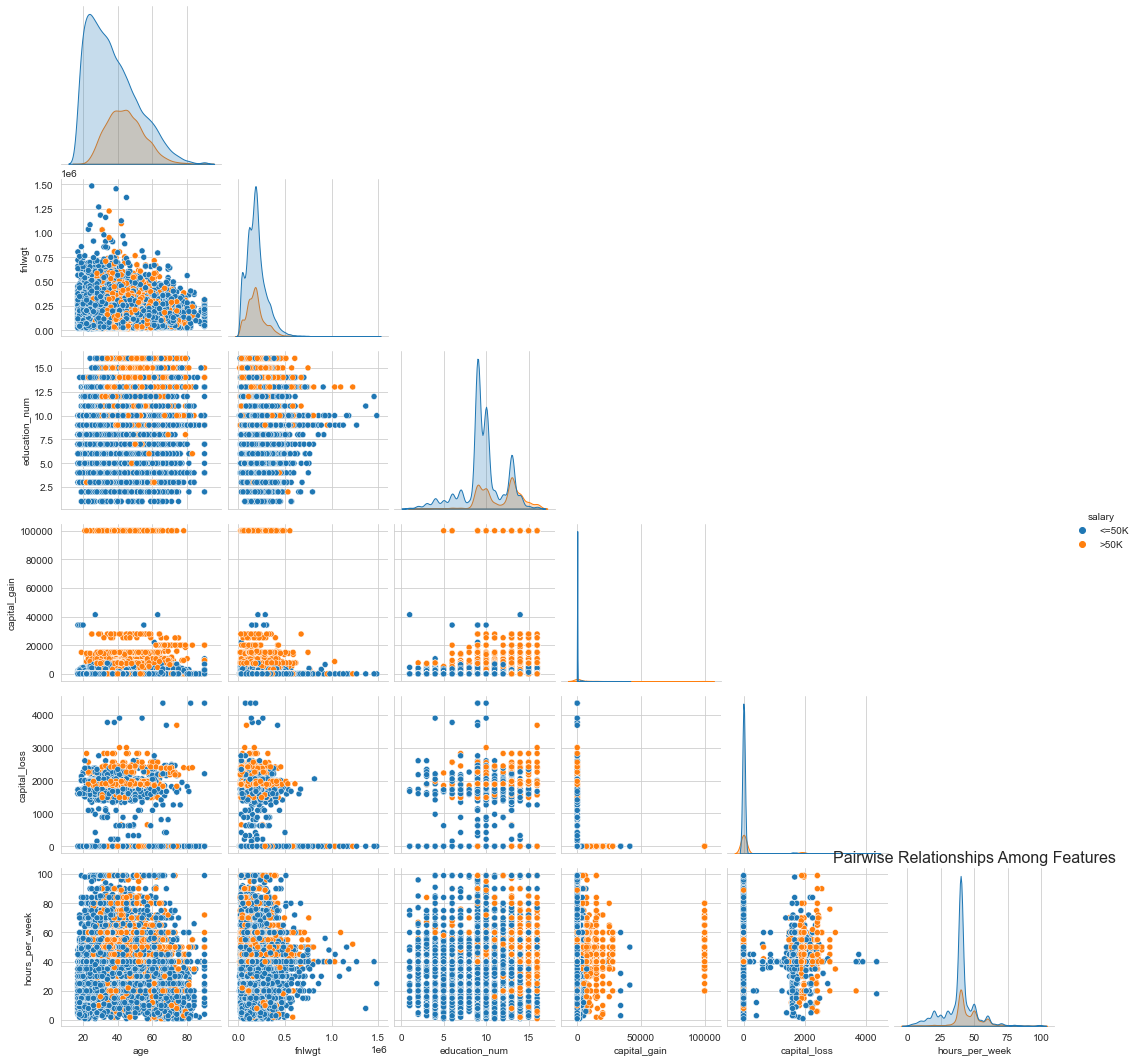

In [64]:
# Checking the relationship between each numeric features by target feature (salary) in one plot basically

sns.pairplot(data=df, hue='salary',corner=True)
plt.title("Pairwise Relationships Among Features", fontsize=16);

## 2.3. Categorical Features

### 2.3.1. education & education_num

In [65]:
# Checking the uniques of "education" feature and determining their numbers
df.education.value_counts(dropna=False)

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

In [66]:
# Checking the uniques of "education_num" feature and determining their numbers 

df.education_num.value_counts(dropna=False)

9.000     10208
10.000     7089
13.000     5245
14.000     1686
11.000     1343
7.000      1146
12.000     1044
6.000       916
NaN         802
4.000       630
15.000      559
5.000       503
8.000       424
16.000      405
3.000       329
2.000       159
1.000        49
Name: education_num, dtype: int64

In [67]:
# Comparing the uniques of "education" with those of "education_num"

df.groupby('education').education_num.value_counts(dropna=False)

education     education_num
10th          6.000              916
              NaN                 17
11th          7.000             1146
              NaN                 29
12th          8.000              424
              NaN                  9
1st-4th       2.000              159
              NaN                  7
5th-6th       3.000              329
              NaN                  3
7th-8th       4.000              630
              NaN                 15
9th           5.000              503
              NaN                 11
Assoc-acdm    12.000            1044
              NaN                 23
Assoc-voc     11.000            1343
              NaN                 39
Bachelors     13.000            5245
              NaN                108
Doctorate     16.000             405
              NaN                  8
HS-grad       9.000            10208
              NaN                286
Masters       14.000            1686
              NaN                 36
Preschool 

❗ We can see above every education category associated with a specific number.

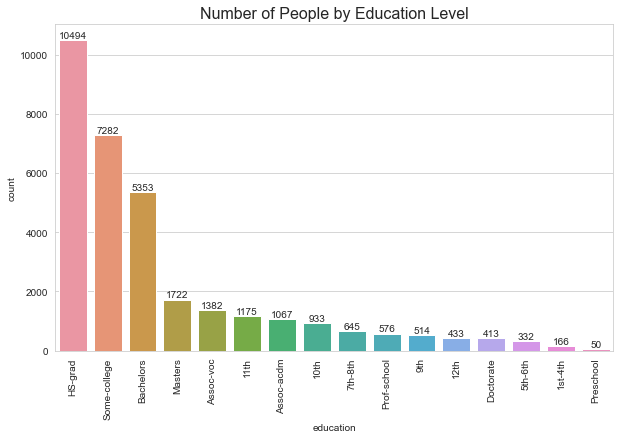

In [68]:
# Visualization of "education" feature

ax = sns.countplot(data=df, x='education', order=df.education.value_counts().index)
plt.xticks(rotation=90)
plt.title("Number of People by Education Level", fontsize=16)
for container in ax.containers:
    ax.bar_label(container);

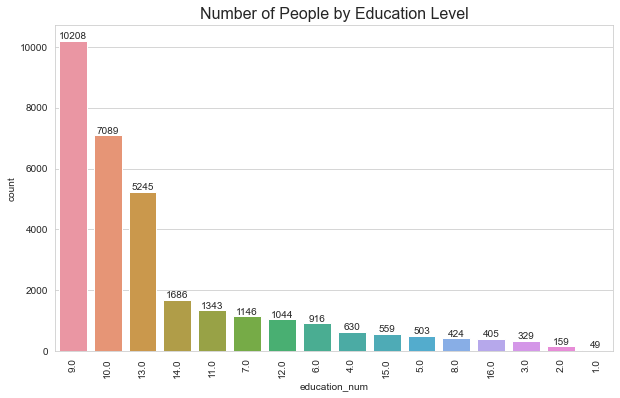

In [69]:
# Visualization of "education" feature
ax = sns.countplot(data=df, x='education_num', order=df.education_num.value_counts().index)
plt.xticks(rotation=90)
plt.title("Number of People by Education Level", fontsize=16)
for container in ax.containers:
    ax.bar_label(container);

In [70]:
# Checking "education" feature by Salary in detail 

df.groupby('education').salary.value_counts()

education     salary
10th          <=50K      871
              >50K        62
11th          <=50K     1115
              >50K        60
12th          <=50K      400
              >50K        33
1st-4th       <=50K      160
              >50K         6
5th-6th       <=50K      316
              >50K        16
7th-8th       <=50K      605
              >50K        40
9th           <=50K      487
              >50K        27
Assoc-acdm    <=50K      802
              >50K       265
Assoc-voc     <=50K     1021
              >50K       361
Bachelors     <=50K     3132
              >50K      2221
Doctorate     >50K       306
              <=50K      107
HS-grad       <=50K     8820
              >50K      1674
Masters       >50K       959
              <=50K      763
Preschool     <=50K       50
Prof-school   >50K       423
              <=50K      153
Some-college  <=50K     5896
              >50K      1386
Name: salary, dtype: int64

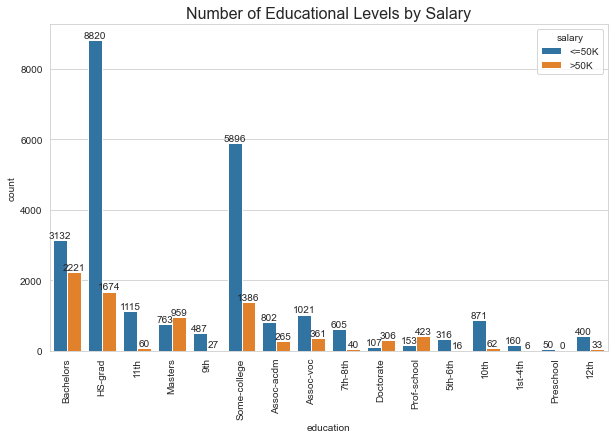

In [71]:
# Visualizing the number of people in each "education" level by Salary
ax = sns.countplot(data=df, x='education' ,hue='salary')
plt.title("Number of Educational Levels by Salary", fontsize=16)
plt.xticks(rotation=90)
for container in ax.containers:
    ax.bar_label(container);

In [72]:
# Checking "education_num" feature by Salary in detail 

df.groupby("education_num").salary.value_counts()

education_num  salary
1.000          <=50K       49
2.000          <=50K      153
               >50K         6
3.000          <=50K      313
               >50K        16
4.000          <=50K      592
               >50K        38
5.000          <=50K      477
               >50K        26
6.000          <=50K      854
               >50K        62
7.000          <=50K     1088
               >50K        58
8.000          <=50K      391
               >50K        33
9.000          <=50K     8579
               >50K      1629
10.000         <=50K     5746
               >50K      1343
11.000         <=50K      994
               >50K       349
12.000         <=50K      787
               >50K       257
13.000         <=50K     3078
               >50K      2167
14.000         >50K       935
               <=50K      751
15.000         >50K       410
               <=50K      149
16.000         >50K       302
               <=50K      103
Name: salary, dtype: int64

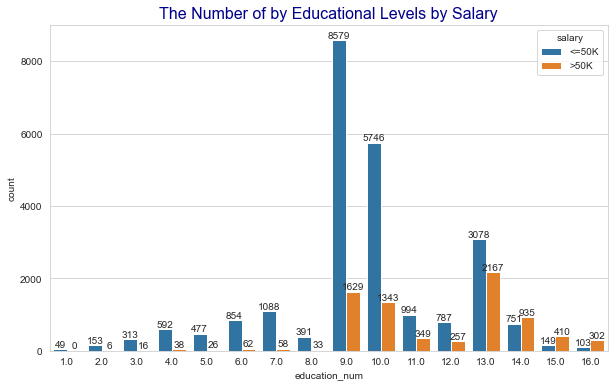

In [73]:
# Visualizing the number of people in each "education_num" level by Salary

ax = sns.countplot(data=df, x="education_num", hue="salary")

plt.title("The Number of by Educational Levels by Salary", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

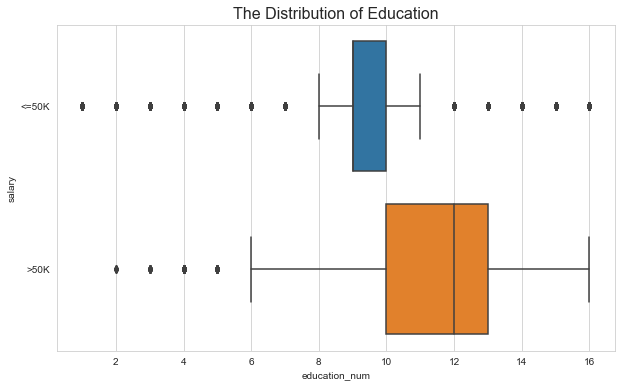

In [74]:
# Checking the extreme values in the "education_num" by Salary with box plot

sns.boxplot(data=df, y="salary", x="education_num")

plt.title("The Distribution of Education", fontsize=16);

❗ we can conclude from above the more education level the more income

Decreasing the number of categories in "education" feature as low, medium, and high level and create a new feature with this new categorical data.

In [75]:
def education_categories(x):
    if x in ["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th"]:
        return 'low_level_grade'
    elif x in ["HS-grad", "Some-college", "Assoc-voc", "Assoc-acdm"]:
        return 'medium_level_grade'
    else:
        return 'high_level_grade'

In [76]:
df.education.apply(education_categories).value_counts(dropna=False)

medium_level_grade    20225
high_level_grade       8064
low_level_grade        4248
Name: education, dtype: int64

In [77]:
# creating a new feature named education_category
df['education_category']=df.education.apply(education_categories)

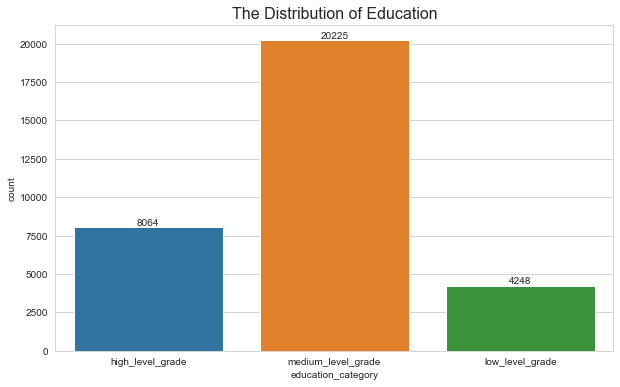

In [78]:
ax = sns.countplot(data=df, x='education_category')
plt.title("The Distribution of Education", fontsize=16)
for container in ax.containers:
    ax.bar_label(container);

In [79]:
# The number of persons in each "education_category" levels by Salary (high, medium, low)
df.groupby('education_category').salary.value_counts()

education_category  salary
high_level_grade    <=50K      4155
                    >50K       3909
low_level_grade     <=50K      4004
                    >50K        244
medium_level_grade  <=50K     16539
                    >50K       3686
Name: salary, dtype: int64

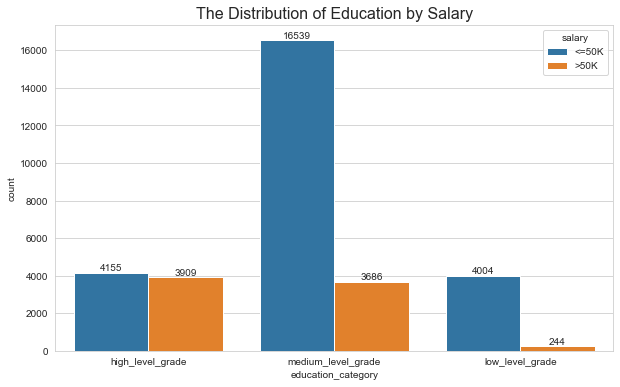

In [80]:
# Visualizing the number of people in each sub-categories of "education_category" by Salary
ax = sns.countplot(data=df, x='education_category', hue='salary' )
plt.title('The Distribution of Education by Salary', fontsize=16)
for container in ax.containers:
    ax.bar_label(container);

In [81]:
# The Proportional Distribution of people in each sub-categories of "education_category" by Salary 
df.groupby('education_category').salary.value_counts(normalize=True)

education_category  salary
high_level_grade    <=50K    0.515
                    >50K     0.485
low_level_grade     <=50K    0.943
                    >50K     0.057
medium_level_grade  <=50K    0.818
                    >50K     0.182
Name: salary, dtype: float64

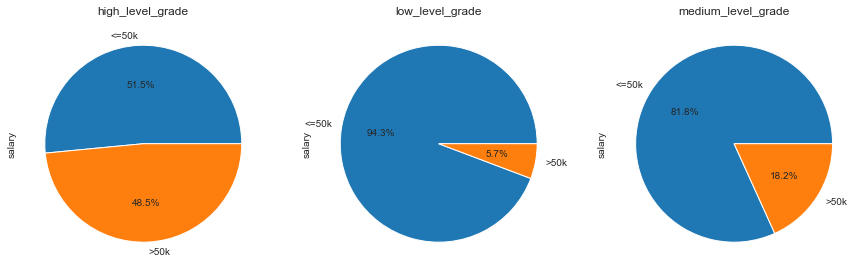

In [82]:
education_pie = df.groupby("education_category").salary.value_counts(normalize=True).unstack(level=0)
education_pie.plot(kind='pie',figsize=(15,5),
                   layout=(1,3),
                   labels=['<=50k','>50k'],
                   autopct='%.1f%%',
                   title=["high_level_grade", "low_level_grade", "medium_level_grade"],
                  subplots = True,
                   legend=False,
                   ylabel="salary",
                    );


In [83]:
# The number of persons in each "salary" by "education_summary" levels (high, medium, low)
df.groupby('salary').education_category.value_counts()

salary  education_category
<=50K   medium_level_grade    16539
        high_level_grade       4155
        low_level_grade        4004
>50K    high_level_grade       3909
        medium_level_grade     3686
        low_level_grade         244
Name: education_category, dtype: int64

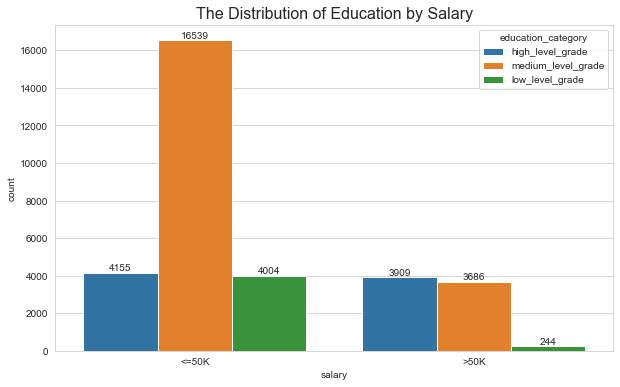

In [84]:
# Visualizing the number of persons in "salary" feature by "education_summary" (high, medium, low) 
ax = sns.countplot(data=df, x='salary', hue='education_category')
plt.title("The Distribution of Education by Salary", fontsize=16)
for container in ax.containers:
    ax.bar_label(container);

In [85]:
# The proportion of persons in each "salary" by "education_summary" levels (high, medium, low)
df.groupby('salary').education_category.value_counts(dropna=False, normalize=True)

salary  education_category
<=50K   medium_level_grade   0.670
        high_level_grade     0.168
        low_level_grade      0.162
>50K    high_level_grade     0.499
        medium_level_grade   0.470
        low_level_grade      0.031
Name: education_category, dtype: float64

In [86]:
salary_pie =  df.groupby("salary").education_category.value_counts(normalize=True).unstack(level=0)
salary_pie

salary,<=50K,>50K
education_category,,
high_level_grade,0.168,0.499
low_level_grade,0.162,0.031
medium_level_grade,0.670,0.470


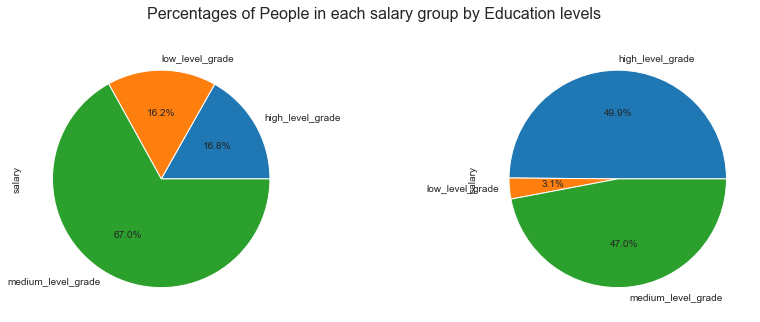

In [87]:

salary_pie.plot(kind='pie',figsize=(15,5),
                    layout=(1,2),
                    labels=["high_level_grade", "low_level_grade", "medium_level_grade"],
                    autopct='%.1f%%',
                    subplots = True,
                    legend=False,
                    ylabel="salary");
plt.suptitle("Percentages of People in each salary group by Education levels ", fontsize=16);

⭐ Conclusion About Education Feature
- Higher education group generally have high income. In other words, the more education the more high income.
- Very low percentage of people have low education level but have high income
- Education and income are correlated

### 2.3.2 marital_status & relationship

In [88]:
# Checking the uniques of "marital_status" feature and determining their numbers
df.marital_status.value_counts(dropna=False)

Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [89]:
# Checking the uniques of "relationship" feature and determining their numbers
df.relationship.value_counts(dropna=False)

Husband           13187
Not-in-family      8292
NaN                5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [90]:
df.relationship.fillna("Unknown",inplace=True)

In [91]:
df.groupby('relationship').marital_status.value_counts(dropna=False)

relationship    marital_status       
Husband         Married-civ-spouse       13178
                Married-AF-spouse            9
Not-in-family   Never-married             4694
                Divorced                  2403
                Widowed                    547
                Separated                  420
                Married-spouse-absent      211
                Married-civ-spouse          17
Other-relative  Never-married              611
                Married-civ-spouse         124
                Divorced                   110
                Separated                   55
                Widowed                     48
                Married-spouse-absent       32
                Married-AF-spouse            1
Unknown         Never-married             4481
                Divorced                   328
                Separated                   99
                Married-civ-spouse          95
                Married-spouse-absent       45
                Widowe

Fatures are compatible with each other but relationship feature has 15% missing values. Also i can't fill relationship values with marital_status feature

In [92]:
# checking The number of people in each marital status by salary level
df.groupby("marital_status").salary.value_counts(dropna=False)

marital_status         salary
Divorced               <=50K      3978
                       >50K        463
Married-AF-spouse      <=50K        13
                       >50K         10
Married-civ-spouse     <=50K      8280
                       >50K       6690
Married-spouse-absent  <=50K       384
                       >50K         34
Never-married          <=50K     10176
                       >50K        491
Separated              <=50K       959
                       >50K         66
Widowed                <=50K       908
                       >50K         85
Name: salary, dtype: int64

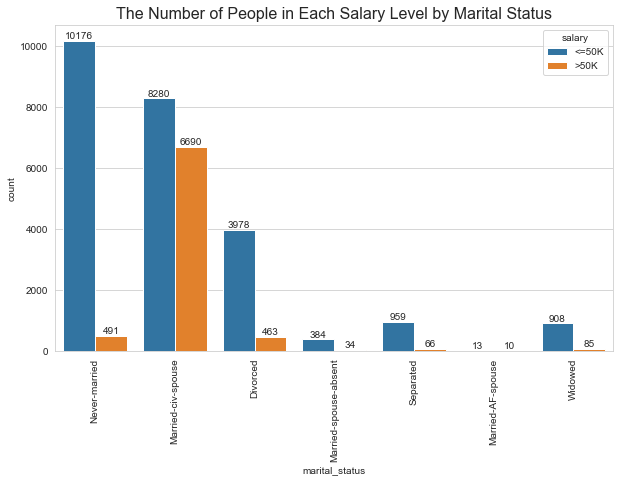

In [93]:
# Visualizing the number of "marital_status" by "relationship" 

ax = sns.countplot(data=df, x="marital_status", hue="salary")

plt.title("The Number of People in Each Salary Level by Marital Status", fontsize=16)
plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container);

To decrease the number of categories I'll combine "Never-married", "Divorced", "Separated", "Widowed" as single, "Married-civ-spouse", "Married-AF-spouse", "Married-spouse-absent" as married

In [94]:
def combine_marital_status(x):
    if x in [ "Never-married", "Divorced", "Separated", "Widowed"]:
        return 'Single'
    else:
        return 'Married'

In [95]:
df['marital_status_summary'] = df.marital_status.apply(combine_marital_status)

In [96]:
df.marital_status_summary.value_counts()

Single     17126
Married    15411
Name: marital_status_summary, dtype: int64

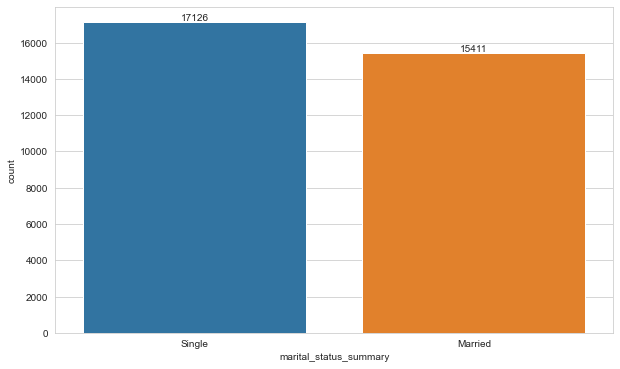

In [97]:
ax = sns.countplot(data=df, x='marital_status_summary')
for i in ax.containers:
    ax.bar_label(i)

In [98]:
# Checking the number of people in each sub-categories of "marital_status_summary" (single, married) by Salary
df.groupby('salary').marital_status_summary.value_counts()

salary  marital_status_summary
<=50K   Single                    16021
        Married                    8677
>50K    Married                    6734
        Single                     1105
Name: marital_status_summary, dtype: int64

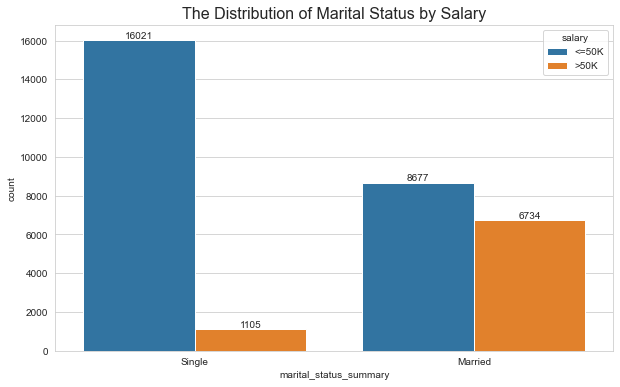

In [99]:
# Visualizing the number of persons in each sub-categories of "marital_status_summary" (single, married) by Salary
ax = sns.countplot(data=df, x='marital_status_summary', hue='salary')
for i in ax.containers:
    ax.bar_label(i);
plt.title("The Distribution of Marital Status by Salary", fontsize=16);


In [100]:
# Checking the proportion of persons in each "marital_status_summary" by "salary" levels (<=50K, >50K)
df.groupby(["marital_status_summary"]).salary.value_counts(normalize=True)

marital_status_summary  salary
Married                 <=50K    0.563
                        >50K     0.437
Single                  <=50K    0.935
                        >50K     0.065
Name: salary, dtype: float64

In [101]:
marital_pie =  df.groupby(["marital_status_summary"]).salary.value_counts(normalize=True).unstack(level=0)
marital_pie

marital_status_summary,Married,Single
salary,,
<=50K,0.563,0.935
>50K,0.437,0.065


array([[<AxesSubplot:ylabel='Married'>, <AxesSubplot:ylabel='Single'>]],
      dtype=object)

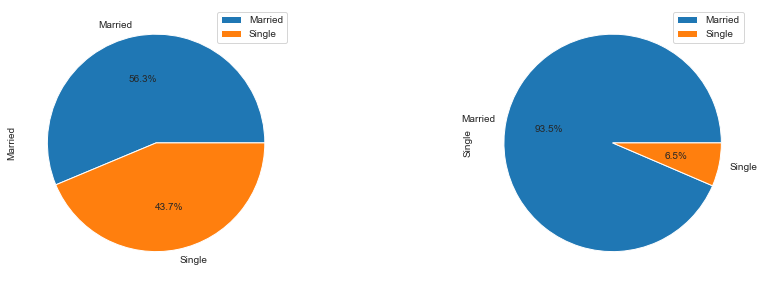

In [102]:
marital_pie.plot.pie(layout=(1,2),
                    labels=["Married", "Single"],
                    autopct='%.1f%%',
                    subplots = True, figsize=(15, 5))

In [103]:
# Checking the number of people in each sub-categories of Salary by "marital_status_summary" levels (single, married) 

df.groupby("salary").marital_status_summary.value_counts()

salary  marital_status_summary
<=50K   Single                    16021
        Married                    8677
>50K    Married                    6734
        Single                     1105
Name: marital_status_summary, dtype: int64

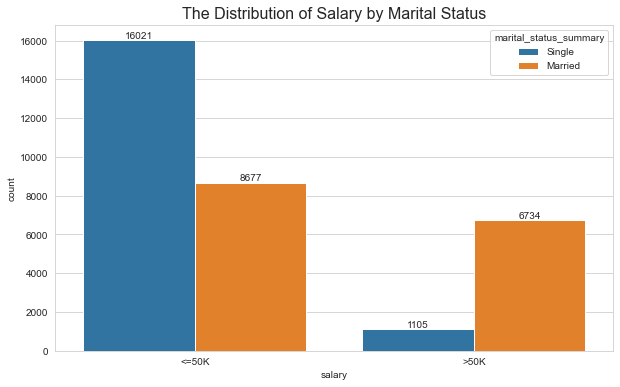

In [104]:
# Visualizing the number of persons in each sub-categories of Salary by "marital_status_summary" (single, married)
ax = sns.countplot(data=df, x='salary', hue='marital_status_summary')
for i in ax.containers:
    ax.bar_label(i);
plt.title("The Distribution of Salary by Marital Status", fontsize=16);

In [105]:
# Checking the proportion of persons in each "salary" levels (<=50K, >50K) by "marital_status_summary" (single, married)

df.groupby("salary").marital_status_summary.value_counts(normalize=True)

salary  marital_status_summary
<=50K   Single                   0.649
        Married                  0.351
>50K    Married                  0.859
        Single                   0.141
Name: marital_status_summary, dtype: float64

In [106]:
df.groupby(["salary"]).marital_status_summary.value_counts(normalize=True)

salary  marital_status_summary
<=50K   Single                   0.649
        Married                  0.351
>50K    Married                  0.859
        Single                   0.141
Name: marital_status_summary, dtype: float64

In [107]:
marital_pie_salary =  df.groupby(["salary"]).marital_status_summary.value_counts(normalize=True).unstack(level=0)
marital_pie_salary

salary,<=50K,>50K
marital_status_summary,,
Married,0.351,0.859
Single,0.649,0.141


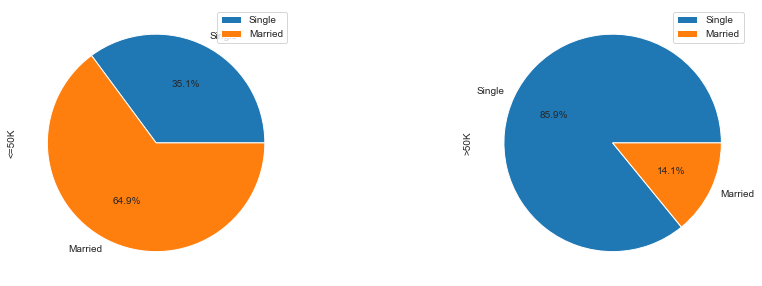

In [108]:
marital_pie_salary.plot.pie(layout=(1,2),
                    labels=["Single", "Married"],
                    autopct='%.1f%%',
                    subplots = True, figsize=(15, 5));

⭐ Conclusion About Education Feature
- it is concluded that married people have more income than single people. 
- in high level group 85% of people are married
- This means marital status is associated with income


### 2.3.3 workclass

In [109]:
# Checking the counts of unique values in "workclass" feature
df.workclass.value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

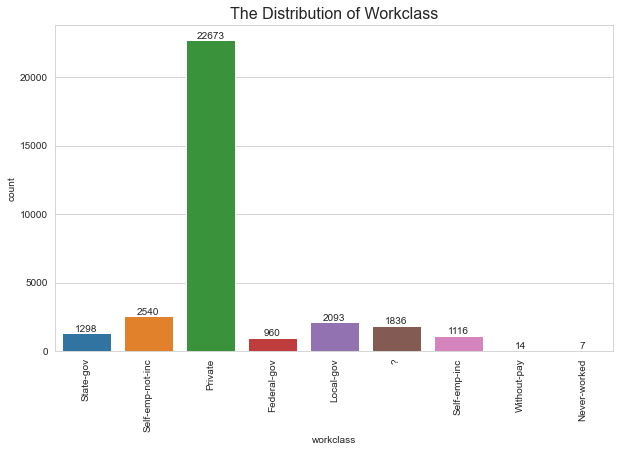

In [110]:
ax = sns.countplot(data=df, x='workclass')

for i in ax.containers:
        ax.bar_label(i)

plt.xticks(rotation = 90)
plt.title("The Distribution of Workclass", fontsize = 16);

In [111]:
# Replacing "?" values with "Unknown"
df.workclass.replace('?',"Unknown",inplace=True)

In [112]:
df.workclass.value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [113]:
# Checking the number of persons in each sub-categories of "workclass" by "salary" levels  
df.groupby('workclass').salary.value_counts()

workclass         salary
Federal-gov       <=50K       589
                  >50K        371
Local-gov         <=50K      1476
                  >50K        617
Never-worked      <=50K         7
Private           <=50K     17712
                  >50K       4961
Self-emp-inc      >50K        622
                  <=50K       494
Self-emp-not-inc  <=50K      1816
                  >50K        724
State-gov         <=50K       945
                  >50K        353
Unknown           <=50K      1645
                  >50K        191
Without-pay       <=50K        14
Name: salary, dtype: int64

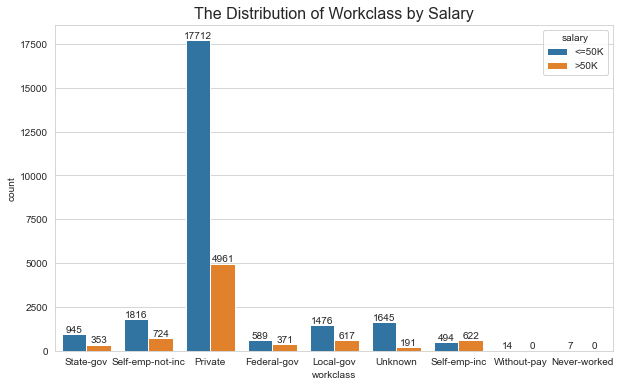

In [114]:
# Visualizing the number of "workclass" by Salary 
ax = sns.countplot(data=df , x='workclass', hue='salary')

plt.title("The Distribution of Workclass by Salary", fontsize=16)

for i in ax.containers:
    ax.bar_label(i)


In [115]:
# The proportion of people in each "workclass" levels by "salary" (<=50K, >50K)
work_percentage = df.groupby('workclass').salary.value_counts(normalize=True)
work_percentage

workclass         salary
Federal-gov       <=50K    0.614
                  >50K     0.386
Local-gov         <=50K    0.705
                  >50K     0.295
Never-worked      <=50K    1.000
Private           <=50K    0.781
                  >50K     0.219
Self-emp-inc      >50K     0.557
                  <=50K    0.443
Self-emp-not-inc  <=50K    0.715
                  >50K     0.285
State-gov         <=50K    0.728
                  >50K     0.272
Unknown           <=50K    0.896
                  >50K     0.104
Without-pay       <=50K    1.000
Name: salary, dtype: float64

In [116]:
work_percentage_df = pd.DataFrame(work_percentage)
work_percentage_df

salary
workclass        salary        
Federal-gov      <=50K    0.614
                 >50K     0.386
Local-gov        <=50K    0.705
                 >50K     0.295
Never-worked     <=50K    1.000
Private          <=50K    0.781
                 >50K     0.219
Self-emp-inc     >50K     0.557
                 <=50K    0.443
Self-emp-not-inc <=50K    0.715
                 >50K     0.285
State-gov        <=50K    0.728
                 >50K     0.272
Unknown          <=50K    0.896
                 >50K     0.104
Without-pay      <=50K    1.000

In [117]:
work_percentage_df.columns=['percentage']
work_percentage_df

percentage
workclass        salary            
Federal-gov      <=50K        0.614
                 >50K         0.386
Local-gov        <=50K        0.705
                 >50K         0.295
Never-worked     <=50K        1.000
Private          <=50K        0.781
                 >50K         0.219
Self-emp-inc     >50K         0.557
                 <=50K        0.443
Self-emp-not-inc <=50K        0.715
                 >50K         0.285
State-gov        <=50K        0.728
                 >50K         0.272
Unknown          <=50K        0.896
                 >50K         0.104
Without-pay      <=50K        1.000

In [118]:
work_percentage_df.reset_index(inplace=True)
work_percentage_df

,workclass,salary,percentage
0,Federal-gov,<=50K,0.614
1,Federal-gov,>50K,0.386
2,Local-gov,<=50K,0.705
3,Local-gov,>50K,0.295
4,Never-worked,<=50K,1.000
5,Private,<=50K,0.781
6,Private,>50K,0.219
7,Self-emp-inc,>50K,0.557
8,Self-emp-inc,<=50K,0.443
9,Self-emp-not-inc,<=50K,0.715


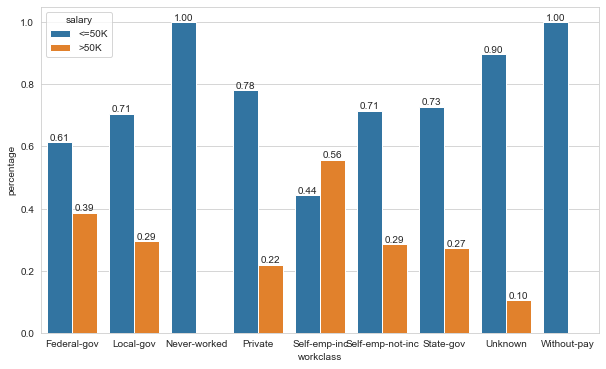

In [119]:
ax = sns.barplot(data=work_percentage_df,
              x='workclass',
              y='percentage',
              hue='salary')
for i in ax.containers:
    ax.bar_label(i,fmt='%.2f')

In [120]:
# Checking the number of pwople in each sub-categories of "salary" by "workclass" levels 
df.groupby('salary').workclass.value_counts()

salary  workclass       
<=50K   Private             17712
        Self-emp-not-inc     1816
        Unknown              1645
        Local-gov            1476
        State-gov             945
        Federal-gov           589
        Self-emp-inc          494
        Without-pay            14
        Never-worked            7
>50K    Private              4961
        Self-emp-not-inc      724
        Self-emp-inc          622
        Local-gov             617
        Federal-gov           371
        State-gov             353
        Unknown               191
Name: workclass, dtype: int64

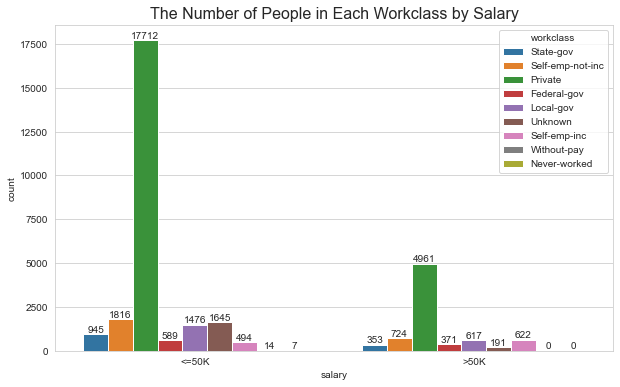

In [121]:
ax = sns.countplot(data=df, x='salary',hue='workclass' )

plt.title("The Number of People in Each Workclass by Salary", fontsize=16)
for i in ax.containers:
    ax.bar_label(i)

In [122]:
# The proportion of people in each sub-categories of "salary" by "workclass" levels
sal = df.groupby('salary').workclass.value_counts(normalize=True)
sal

salary  workclass       
<=50K   Private            0.717
        Self-emp-not-inc   0.074
        Unknown            0.067
        Local-gov          0.060
        State-gov          0.038
        Federal-gov        0.024
        Self-emp-inc       0.020
        Without-pay        0.001
        Never-worked       0.000
>50K    Private            0.633
        Self-emp-not-inc   0.092
        Self-emp-inc       0.079
        Local-gov          0.079
        Federal-gov        0.047
        State-gov          0.045
        Unknown            0.024
Name: workclass, dtype: float64

In [123]:
sal_df = pd.DataFrame(sal)
sal_df

workclass
salary workclass                  
<=50K  Private               0.717
       Self-emp-not-inc      0.074
       Unknown               0.067
       Local-gov             0.060
       State-gov             0.038
       Federal-gov           0.024
       Self-emp-inc          0.020
       Without-pay           0.001
       Never-worked          0.000
>50K   Private               0.633
       Self-emp-not-inc      0.092
       Self-emp-inc          0.079
       Local-gov             0.079
       Federal-gov           0.047
       State-gov             0.045
       Unknown               0.024

In [124]:
sal_df.rename(columns={'workclass':"percentage"},inplace=True)
sal_df

percentage
salary workclass                   
<=50K  Private                0.717
       Self-emp-not-inc       0.074
       Unknown                0.067
       Local-gov              0.060
       State-gov              0.038
       Federal-gov            0.024
       Self-emp-inc           0.020
       Without-pay            0.001
       Never-worked           0.000
>50K   Private                0.633
       Self-emp-not-inc       0.092
       Self-emp-inc           0.079
       Local-gov              0.079
       Federal-gov            0.047
       State-gov              0.045
       Unknown                0.024

In [125]:
sal_df.reset_index(inplace=True)

In [126]:
sal_df

,salary,workclass,percentage
0,<=50K,Private,0.717
1,<=50K,Self-emp-not-inc,0.074
2,<=50K,Unknown,0.067
3,<=50K,Local-gov,0.060
4,<=50K,State-gov,0.038
5,<=50K,Federal-gov,0.024
6,<=50K,Self-emp-inc,0.020
7,<=50K,Without-pay,0.001
8,<=50K,Never-worked,0.000
9,>50K,Private,0.633


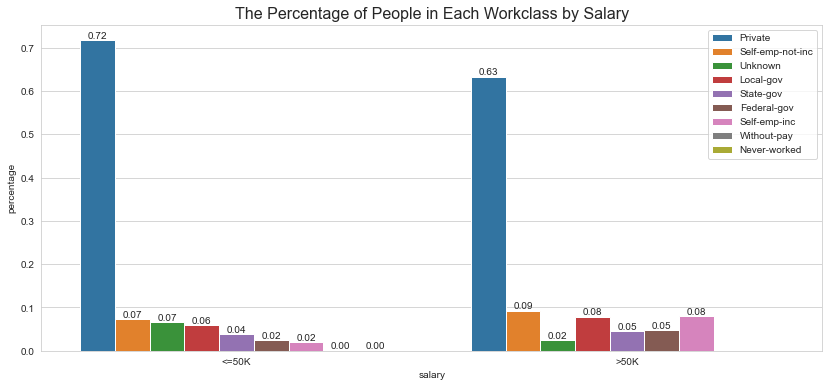

In [127]:
fig, ax = plt.subplots(figsize=(14, 6))
ax = sns.barplot(sal_df, x='salary', y='percentage', hue='workclass')
plt.legend(loc='upper right')
plt.title(("The Percentage of People in Each Workclass by Salary"), fontsize = 16)
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f')

⭐ Conclusion About Workclass Feature
- Private" work-class has a high ratio in both income groups. However, the rate of those in the high level income group in their own group is slightly lower than those in the lower income group.
- "Self-emp-inc" work-class has a high ratio in the self group about high-level income.


### 2.3.4 occupation

In [130]:
df.occupation.value_counts(dropna=False)

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

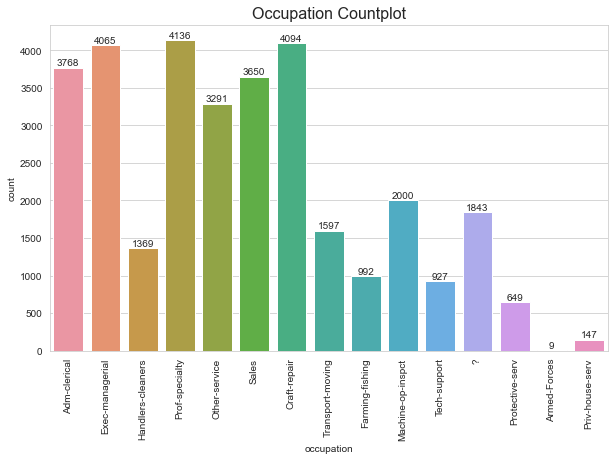

In [134]:
ax = sns.countplot(data=df, x='occupation')
plt.title("The Number of People in Each Occupation", fontsize=16)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i);

In [135]:
df.occupation.replace('?','Unknown',inplace=True)

In [137]:
df.occupation.value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Unknown              1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [139]:
# Checking the number of people in each sub-categories of "occupation" by "salary" levels  
df.groupby('occupation').salary.value_counts()

occupation         salary
Adm-clerical       <=50K     3261
                   >50K       507
Armed-Forces       <=50K        8
                   >50K         1
Craft-repair       <=50K     3165
                   >50K       929
Exec-managerial    <=50K     2097
                   >50K      1968
Farming-fishing    <=50K      877
                   >50K       115
Handlers-cleaners  <=50K     1283
                   >50K        86
Machine-op-inspct  <=50K     1751
                   >50K       249
Other-service      <=50K     3154
                   >50K       137
Priv-house-serv    <=50K      146
                   >50K         1
Prof-specialty     <=50K     2278
                   >50K      1858
Protective-serv    <=50K      438
                   >50K       211
Sales              <=50K     2667
                   >50K       983
Tech-support       <=50K      644
                   >50K       283
Transport-moving   <=50K     1277
                   >50K       320
Unknown            <=5

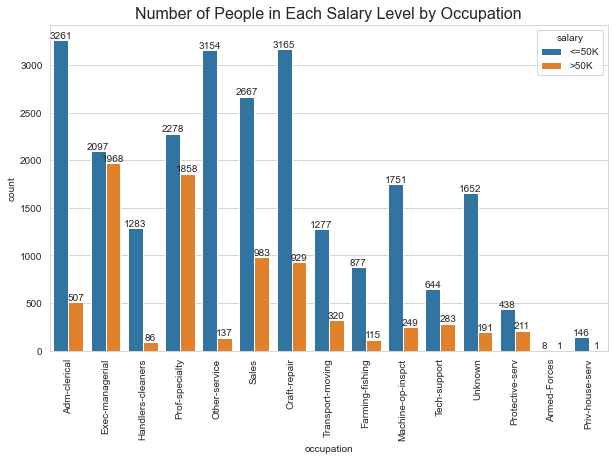

In [147]:
ax = sns.countplot(data=df, x='occupation', hue='salary')
plt.title("Number of People in Each Salary Level by Occupation" , fontsize=16)
plt.xticks(rotation = 90);
for i in ax.containers:
    ax.bar_label(i)

In [149]:
# Checking the proportion of persons in each "salary" levels (<=50K, >50K) by "occupation" 
occu = df.groupby('occupation').salary.value_counts(normalize=True)
occu

occupation         salary
Adm-clerical       <=50K    0.865
                   >50K     0.135
Armed-Forces       <=50K    0.889
                   >50K     0.111
Craft-repair       <=50K    0.773
                   >50K     0.227
Exec-managerial    <=50K    0.516
                   >50K     0.484
Farming-fishing    <=50K    0.884
                   >50K     0.116
Handlers-cleaners  <=50K    0.937
                   >50K     0.063
Machine-op-inspct  <=50K    0.875
                   >50K     0.124
Other-service      <=50K    0.958
                   >50K     0.042
Priv-house-serv    <=50K    0.993
                   >50K     0.007
Prof-specialty     <=50K    0.551
                   >50K     0.449
Protective-serv    <=50K    0.675
                   >50K     0.325
Sales              <=50K    0.731
                   >50K     0.269
Tech-support       <=50K    0.695
                   >50K     0.305
Transport-moving   <=50K    0.800
                   >50K     0.200
Unknown            <=5

In [150]:
occu_df = pd.DataFrame(occu)
occu_df

salary
occupation        salary        
Adm-clerical      <=50K    0.865
                  >50K     0.135
Armed-Forces      <=50K    0.889
                  >50K     0.111
Craft-repair      <=50K    0.773
                  >50K     0.227
Exec-managerial   <=50K    0.516
                  >50K     0.484
Farming-fishing   <=50K    0.884
                  >50K     0.116
Handlers-cleaners <=50K    0.937
                  >50K     0.063
Machine-op-inspct <=50K    0.875
                  >50K     0.124
Other-service     <=50K    0.958
                  >50K     0.042
Priv-house-serv   <=50K    0.993
                  >50K     0.007
Prof-specialty    <=50K    0.551
                  >50K     0.449
Protective-serv   <=50K    0.675
                  >50K     0.325
Sales             <=50K    0.731
                  >50K     0.269
Tech-support      <=50K    0.695
                  >50K     0.305
Transport-moving  <=50K    0.800
                  >50K     0.200
Unknown           <=50K    0.896
                  >50K     0.104

In [152]:
occu_df.rename(columns={"salary":'percentage'},inplace=True)
occu_df

percentage
occupation        salary            
Adm-clerical      <=50K        0.865
                  >50K         0.135
Armed-Forces      <=50K        0.889
                  >50K         0.111
Craft-repair      <=50K        0.773
                  >50K         0.227
Exec-managerial   <=50K        0.516
                  >50K         0.484
Farming-fishing   <=50K        0.884
                  >50K         0.116
Handlers-cleaners <=50K        0.937
                  >50K         0.063
Machine-op-inspct <=50K        0.875
                  >50K         0.124
Other-service     <=50K        0.958
                  >50K         0.042
Priv-house-serv   <=50K        0.993
                  >50K         0.007
Prof-specialty    <=50K        0.551
                  >50K         0.449
Protective-serv   <=50K        0.675
                  >50K         0.325
Sales             <=50K        0.731
                  >50K         0.269
Tech-support      <=50K        0.695
                  >50K         0.305
Transport-moving  <=50K        0.800
                  >50K         0.200
Unknown           <=50K        0.896
                  >50K         0.104

In [155]:
occu_df.reset_index(inplace=True)
occu_df

,occupation,salary,percentage
0,Adm-clerical,<=50K,0.865
1,Adm-clerical,>50K,0.135
2,Armed-Forces,<=50K,0.889
3,Armed-Forces,>50K,0.111
4,Craft-repair,<=50K,0.773
5,Craft-repair,>50K,0.227
6,Exec-managerial,<=50K,0.516
7,Exec-managerial,>50K,0.484
8,Farming-fishing,<=50K,0.884
9,Farming-fishing,>50K,0.116


In [156]:
occu_df.sort_values(by=["occupation",'salary'],inplace=True)
occu_df

,occupation,salary,percentage
0,Adm-clerical,<=50K,0.865
1,Adm-clerical,>50K,0.135
2,Armed-Forces,<=50K,0.889
3,Armed-Forces,>50K,0.111
4,Craft-repair,<=50K,0.773
5,Craft-repair,>50K,0.227
6,Exec-managerial,<=50K,0.516
7,Exec-managerial,>50K,0.484
8,Farming-fishing,<=50K,0.884
9,Farming-fishing,>50K,0.116


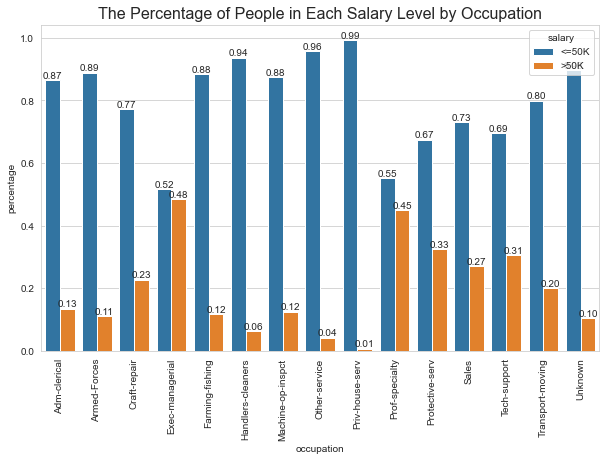

In [168]:
# Visualizing the number of people in each sub-categories of "occupation" by "salary" 
ax = sns.barplot(data=occu_df, x='occupation', y='percentage', hue='salary')
plt.title("The Percentage of People in Each Salary Level by Occupation" , fontsize=16)
plt.xticks(rotation = 90);
for i in ax.containers:
    ax.bar_label(i,fmt='%.2f')


In [169]:
# Checking the number of persons in each "salary" levels by "occupation" 
df.groupby('salary').occupation.value_counts()

salary  occupation       
<=50K   Adm-clerical         3261
        Craft-repair         3165
        Other-service        3154
        Sales                2667
        Prof-specialty       2278
        Exec-managerial      2097
        Machine-op-inspct    1751
        Unknown              1652
        Handlers-cleaners    1283
        Transport-moving     1277
        Farming-fishing       877
        Tech-support          644
        Protective-serv       438
        Priv-house-serv       146
        Armed-Forces            8
>50K    Exec-managerial      1968
        Prof-specialty       1858
        Sales                 983
        Craft-repair          929
        Adm-clerical          507
        Transport-moving      320
        Tech-support          283
        Machine-op-inspct     249
        Protective-serv       211
        Unknown               191
        Other-service         137
        Farming-fishing       115
        Handlers-cleaners      86
        Armed-Forces  

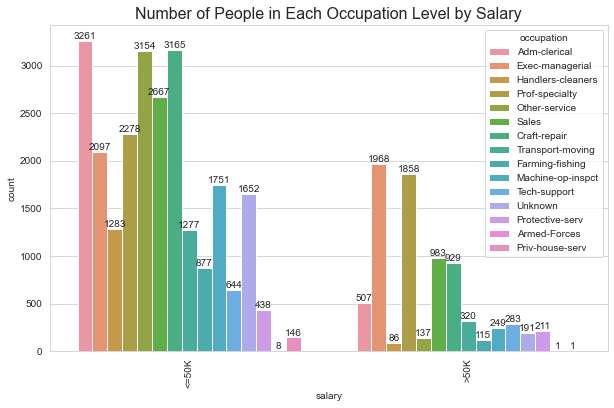

In [171]:
ax = sns.countplot(data=df, x='salary', hue='occupation')
plt.title("Number of People in Each Occupation Level by Salary" , fontsize=16)
plt.xticks(rotation = 90);
for i in ax.containers:
    ax.bar_label(i)

In [182]:
occu2 = df.groupby('salary').occupation.value_counts(normalize=True)
occu2

salary  occupation       
<=50K   Adm-clerical        0.132
        Craft-repair        0.128
        Other-service       0.128
        Sales               0.108
        Prof-specialty      0.092
        Exec-managerial     0.085
        Machine-op-inspct   0.071
        Unknown             0.067
        Handlers-cleaners   0.052
        Transport-moving    0.052
        Farming-fishing     0.036
        Tech-support        0.026
        Protective-serv     0.018
        Priv-house-serv     0.006
        Armed-Forces        0.000
>50K    Exec-managerial     0.251
        Prof-specialty      0.237
        Sales               0.125
        Craft-repair        0.119
        Adm-clerical        0.065
        Transport-moving    0.041
        Tech-support        0.036
        Machine-op-inspct   0.032
        Protective-serv     0.027
        Unknown             0.024
        Other-service       0.017
        Farming-fishing     0.015
        Handlers-cleaners   0.011
        Armed-Forces  

In [183]:
occu2_df = pd.DataFrame(occu2)
occu2_df

occupation
salary occupation                   
<=50K  Adm-clerical            0.132
       Craft-repair            0.128
       Other-service           0.128
       Sales                   0.108
       Prof-specialty          0.092
       Exec-managerial         0.085
       Machine-op-inspct       0.071
       Unknown                 0.067
       Handlers-cleaners       0.052
       Transport-moving        0.052
       Farming-fishing         0.036
       Tech-support            0.026
       Protective-serv         0.018
       Priv-house-serv         0.006
       Armed-Forces            0.000
>50K   Exec-managerial         0.251
       Prof-specialty          0.237
       Sales                   0.125
       Craft-repair            0.119
       Adm-clerical            0.065
       Transport-moving        0.041
       Tech-support            0.036
       Machine-op-inspct       0.032
       Protective-serv         0.027
       Unknown                 0.024
       Other-service           0.017
       Farming-fishing         0.015
       Handlers-cleaners       0.011
       Armed-Forces            0.000
       Priv-house-serv         0.000

In [184]:
occu2_df.rename(columns={'occupation':'percentage'},inplace=True)
occu2_df

percentage
salary occupation                   
<=50K  Adm-clerical            0.132
       Craft-repair            0.128
       Other-service           0.128
       Sales                   0.108
       Prof-specialty          0.092
       Exec-managerial         0.085
       Machine-op-inspct       0.071
       Unknown                 0.067
       Handlers-cleaners       0.052
       Transport-moving        0.052
       Farming-fishing         0.036
       Tech-support            0.026
       Protective-serv         0.018
       Priv-house-serv         0.006
       Armed-Forces            0.000
>50K   Exec-managerial         0.251
       Prof-specialty          0.237
       Sales                   0.125
       Craft-repair            0.119
       Adm-clerical            0.065
       Transport-moving        0.041
       Tech-support            0.036
       Machine-op-inspct       0.032
       Protective-serv         0.027
       Unknown                 0.024
       Other-service           0.017
       Farming-fishing         0.015
       Handlers-cleaners       0.011
       Armed-Forces            0.000
       Priv-house-serv         0.000

In [185]:
occu2_df.reset_index(inplace=True)
occu2_df

,salary,occupation,percentage
0,<=50K,Adm-clerical,0.132
1,<=50K,Craft-repair,0.128
2,<=50K,Other-service,0.128
3,<=50K,Sales,0.108
4,<=50K,Prof-specialty,0.092
5,<=50K,Exec-managerial,0.085
6,<=50K,Machine-op-inspct,0.071
7,<=50K,Unknown,0.067
8,<=50K,Handlers-cleaners,0.052
9,<=50K,Transport-moving,0.052


In [187]:
occu2_df.sort_values(by=['salary','occupation'],inplace=True)
occu2_df

,salary,occupation,percentage
0,<=50K,Adm-clerical,0.132
14,<=50K,Armed-Forces,0.000
1,<=50K,Craft-repair,0.128
5,<=50K,Exec-managerial,0.085
10,<=50K,Farming-fishing,0.036
8,<=50K,Handlers-cleaners,0.052
6,<=50K,Machine-op-inspct,0.071
2,<=50K,Other-service,0.128
13,<=50K,Priv-house-serv,0.006
4,<=50K,Prof-specialty,0.092


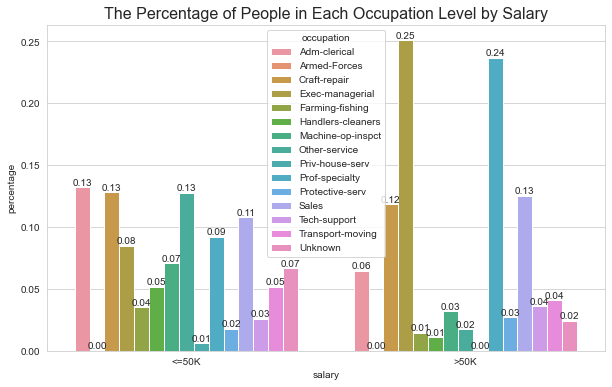

In [191]:
ax = sns.barplot(data=occu2_df, x='salary', y='percentage', hue='occupation')
plt.title("The Percentage of People in Each Occupation Level by Salary" , fontsize=16)

for i in ax.containers:
    ax.bar_label(i,fmt='%.2f')

⭐ Conclusion About Occupation Feature
- Exec-managerial" and "Prof-specialty" occupations have a high ratio of high-level income both in the self group and in the high-income group.

### 2.3.4 race

In [192]:
df.race.value_counts(dropna=False)

White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

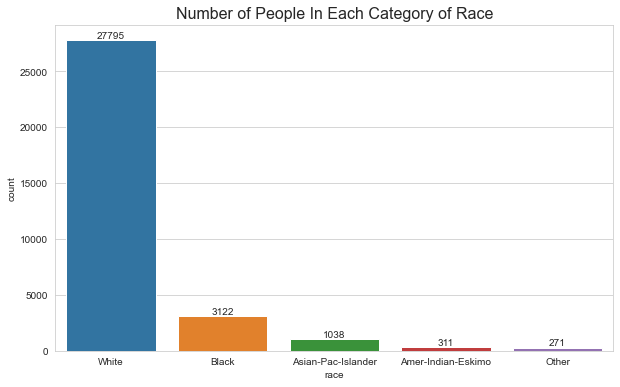

In [194]:
# Visualizing the number of people in each category of "race"
ax = sns.countplot(data=df, x='race')
plt.title("Number of People In Each Category of Race", fontsize=16)
for i in ax.containers:
    ax.bar_label(i);

In [197]:
# Checking the number of people in each sub-categories of "race" by "salary"
df.groupby('race').salary.value_counts()

race                salary
Amer-Indian-Eskimo  <=50K       275
                    >50K         36
Asian-Pac-Islander  <=50K       762
                    >50K        276
Black               <=50K      2735
                    >50K        387
Other               <=50K       246
                    >50K         25
White               <=50K     20680
                    >50K       7115
Name: salary, dtype: int64

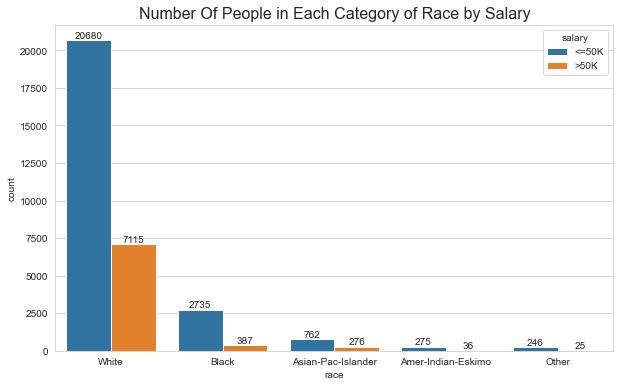

In [201]:
# Visualizing the number of people in each category of "race" by "salary"
ax = sns.countplot(data=df, x='race',hue='salary')
plt.title("Number Of People in Each Category of Race by Salary", fontsize=16)
for i in ax.containers:
    ax.bar_label(i);

In [202]:
# Checking the proportion of people in each "race" group by "salary" levels

race = df.groupby("race").salary.value_counts(normalize=True)
race

race                salary
Amer-Indian-Eskimo  <=50K    0.884
                    >50K     0.116
Asian-Pac-Islander  <=50K    0.734
                    >50K     0.266
Black               <=50K    0.876
                    >50K     0.124
Other               <=50K    0.908
                    >50K     0.092
White               <=50K    0.744
                    >50K     0.256
Name: salary, dtype: float64

In [203]:
race_df = pd.DataFrame(race)
race_df

salary
race               salary        
Amer-Indian-Eskimo <=50K    0.884
                   >50K     0.116
Asian-Pac-Islander <=50K    0.734
                   >50K     0.266
Black              <=50K    0.876
                   >50K     0.124
Other              <=50K    0.908
                   >50K     0.092
White              <=50K    0.744
                   >50K     0.256

In [205]:
race_df.rename(columns={'salary':'percentage'}, inplace=True)
race_df

percentage
race               salary            
Amer-Indian-Eskimo <=50K        0.884
                   >50K         0.116
Asian-Pac-Islander <=50K        0.734
                   >50K         0.266
Black              <=50K        0.876
                   >50K         0.124
Other              <=50K        0.908
                   >50K         0.092
White              <=50K        0.744
                   >50K         0.256

In [206]:
race_df.reset_index(inplace=True)
race_df

,race,salary,percentage
0,Amer-Indian-Eskimo,<=50K,0.884
1,Amer-Indian-Eskimo,>50K,0.116
2,Asian-Pac-Islander,<=50K,0.734
3,Asian-Pac-Islander,>50K,0.266
4,Black,<=50K,0.876
5,Black,>50K,0.124
6,Other,<=50K,0.908
7,Other,>50K,0.092
8,White,<=50K,0.744
9,White,>50K,0.256


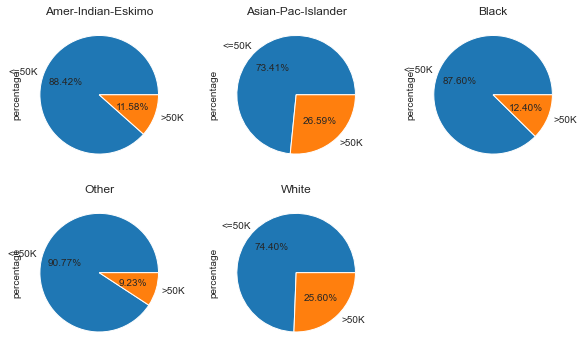

In [258]:
a = 1
for i in range(0,10,2):
    plt.subplot(2,3,a)
    race_df.iloc[i:i+2,2].plot.pie(subplots=True,
                                   labels =["<=50K", ">50K"],
                                   autopct = "%.2f%%"
                              )
    plt.title(race.index[i][0])
    a +=1

In [259]:
# Checking the number of persons in each sub-categories of "race" by "salary" levels  

df.groupby("salary").race.value_counts()

salary  race              
<=50K   White                 20680
        Black                  2735
        Asian-Pac-Islander      762
        Amer-Indian-Eskimo      275
        Other                   246
>50K    White                  7115
        Black                   387
        Asian-Pac-Islander      276
        Amer-Indian-Eskimo       36
        Other                    25
Name: race, dtype: int64

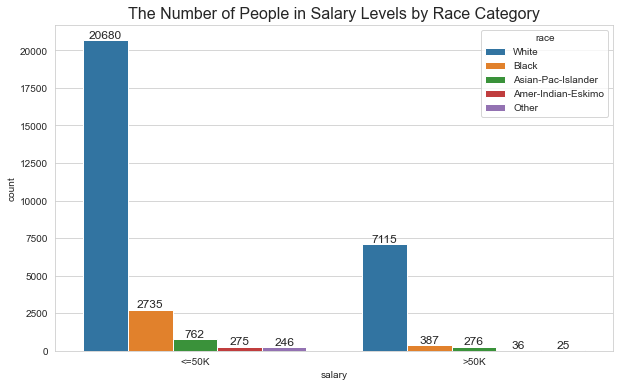

In [260]:
# Visualizing the number of persons in each sub-categories of "race" by "salary" levels  

ax = sns.countplot(data=df, x="salary", hue="race")

plt.title("The Number of People in Salary Levels by Race Category", fontsize=16);
for container in ax.containers:
    ax.bar_label(container, fontsize=12);

In [261]:
# Checking the percentage of persons at "race" by "salary" levels 

race2 = df.groupby("salary").race.value_counts(normalize=True)
race2

salary  race              
<=50K   White                0.837
        Black                0.111
        Asian-Pac-Islander   0.031
        Amer-Indian-Eskimo   0.011
        Other                0.010
>50K    White                0.908
        Black                0.049
        Asian-Pac-Islander   0.035
        Amer-Indian-Eskimo   0.005
        Other                0.003
Name: race, dtype: float64

In [262]:
race2_df = pd.DataFrame(race2)
race2_df

race
salary race                    
<=50K  White              0.837
       Black              0.111
       Asian-Pac-Islander 0.031
       Amer-Indian-Eskimo 0.011
       Other              0.010
>50K   White              0.908
       Black              0.049
       Asian-Pac-Islander 0.035
       Amer-Indian-Eskimo 0.005
       Other              0.003

In [263]:
race2_df.rename(columns={'race':'percentage'},inplace=True)
race2_df

percentage
salary race                          
<=50K  White                    0.837
       Black                    0.111
       Asian-Pac-Islander       0.031
       Amer-Indian-Eskimo       0.011
       Other                    0.010
>50K   White                    0.908
       Black                    0.049
       Asian-Pac-Islander       0.035
       Amer-Indian-Eskimo       0.005
       Other                    0.003

In [264]:
race2_df.reset_index(inplace=True)
race2_df

,salary,race,percentage
0,<=50K,White,0.837
1,<=50K,Black,0.111
2,<=50K,Asian-Pac-Islander,0.031
3,<=50K,Amer-Indian-Eskimo,0.011
4,<=50K,Other,0.010
5,>50K,White,0.908
6,>50K,Black,0.049
7,>50K,Asian-Pac-Islander,0.035
8,>50K,Amer-Indian-Eskimo,0.005
9,>50K,Other,0.003


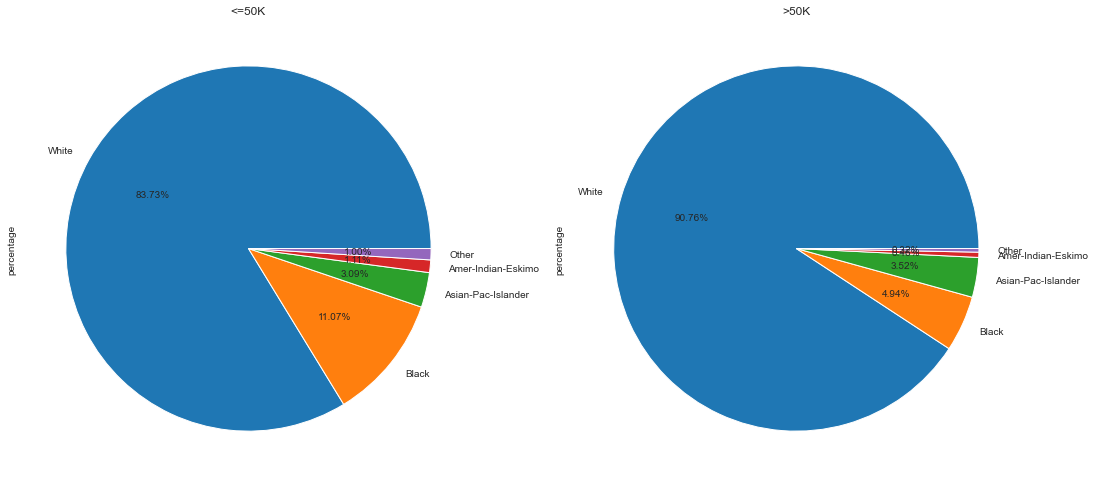

In [276]:
plt.figure(figsize = (18, 12))
a = 1
for i in range(0,10,5):
    plt.subplot(1,2,a)
    race2_df.iloc[i:i+5,2].plot.pie(subplots=True,
                                labels=['White','Black','Asian-Pac-Islander','Amer-Indian-Eskimo','Other'],
                                autopct="%.2f%%")
    plt.title(race2_df.iloc[i,0])
    a+=1

⭐ Conclusion About Race Feature
- Whites and Asian-Pac-Islanders have high ratio of high level income
- 25.6% of whites and 26.6% of Asian-Pac-Islanders have income over 50K, compared to 12.4% of Blacks, 11.6% of Amer-Indian-Eskimo and 9.2% of Others. Race seems to be a factor in salary.